<a href="https://www.kaggle.com/code/heshamibrahem/mobile-price?scriptVersionId=116311857" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

##### <a id="e"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:400%;text-align:center;border-radius: 15px 50px;">MOBILE PRICES</h1>

##### <a id="ta"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:400%;text-align:center;border-radius: 15px 50px;">TABLE OF CONTENT</h1>

* [1. IMPORTANT lIBRARIES ](#1)
    
* [2. LOAD CSV FILES ](#2)
  
* [3. IMPORTANT FONTS ](#f)

* [4. DATA CLEANING AND PREPROCESSING ](#3)

* [5. DATA VISUALIZATION ](#4)

    * [5.1. BATTERY POWER AND PRICE ](#4.1)
    
    * [5.2. BLUETOOTH AND PRICE ](#4.2)
    
    * [5.3. THE OTHER COLUMNS ](#4.3)
    
    * [5.4. FEATURE COMBINATION ](#4.4)

* [6. MACHINE LEARNING ](#5)

    * [6.1. THE TARGET VALUE ](#5.1)
    
    * [6.2. PREPARE THE DATA ](#5.2)
    
    * [6.3. LOGISTIC REGRESSION ](#5.3)
    
    * [6.4. KNEIGHBORS CLASSIFIER ](#5.4)
    
    * [6.5. SUPPORT VECTOR MACHINE (SVM) ](#5.5)
    
    * [6.6. DECISION TREE ](#5.6)
    
    * [6.7. RANDOM FOREST ](#5.7)
    
    * [6.8. NAIVE BAYES ](#5.8)
    
    * [6.9. COMPARISON OF IMPLEMENTED ALGORITHMS ](#5.9)

##### <a id="1"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">IMPORTANT lIBRARIES</h1>

In [1]:
# for dataset
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# will use it later
import time

##### <a id="2"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">LOAD CSV FILES</h1>

In [2]:
test_df = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
train_df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [3]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##### <a id="f"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">IMPORTANT FONTS</h1>

In [5]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'blue','size':15}

##### <a id="3"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">DATA CLEANING AND PREPROCESSING</h1>

> It's better to merge test and train to gain more information for visualization test and train will be used individually in machine learning later

In [6]:
df = train_df.append(test_df)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [7]:
print("test size is: "+str(test_df.shape))
print("train size is: "+str(train_df.shape))
print("total size is: "+str(df.shape))

test size is: (1000, 21)
train size is: (2000, 21)
total size is: (3000, 22)


**1000 + 2000 = 3000 so the merge is succeeded**

We need to make sure if all columns are integer or float because it should be these types

In [8]:
for i in df.columns:
    if df[i].dtype != "int" and df[i].dtype != "float":
        print(str(i) + " need to be fixed")

All columns are ok

Nan values need to be checked

In [9]:
df.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range       True
id                True
dtype: bool

In [10]:
print('Nan number for price_range is: ' + str(df['price_range'].isna().sum()))
print('Nan number for id is: ' + str(df['id'].isna().sum()))

Nan number for price_range is: 1000
Nan number for id is: 2000


In [11]:
try:
    test_df['price_range']
except:
    print("price range isn't in test")

price range isn't in test


In [12]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [13]:
not_train = [i for i in test_df.columns if i not in train_df.columns]
not_test = [i for i in train_df.columns if i not in test_df.columns]
print("data not in train: "+str(not_train))
print("data not in test: "+str(not_test))

data not in train: ['id']
data not in test: ['price_range']


In [14]:
test_df['id']

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: id, Length: 1000, dtype: int64

In [15]:
train_df['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

So test.csv isn't an important csv because it doesn't have the output "price_range"

In [16]:
df = train_df.copy() # in order not to edit in both

In [17]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
train_df.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [19]:
df[df.duplicated()] # check if there's duplicated values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


data is cleaned no need to clean the data

##### <a id="4"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">DATA VISUALIZATION</h1>

In [20]:
df.price_range.unique()

array([1, 2, 3, 0])

##### <a id="4.1"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">BATTERY POWER AND PRICE</h1>

In [21]:
df.battery_power.unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

numerical input

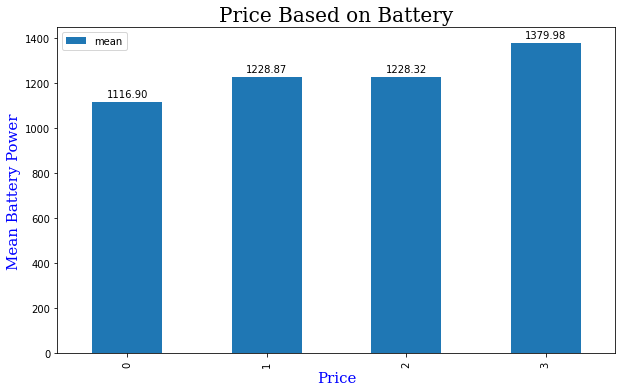

In [22]:
mean_battery = df.groupby("price_range").agg(["mean"])["battery_power"]
mean_battery.plot(kind="bar",figsize=(10, 6))
plt.title("Price Based on Battery", fontdict = font1)
plt.xlabel("Price", fontdict = font2)
plt.ylabel("Mean Battery Power", fontdict = font2)
for x,y in zip(mean_battery.index,mean_battery['mean']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
plt.show()

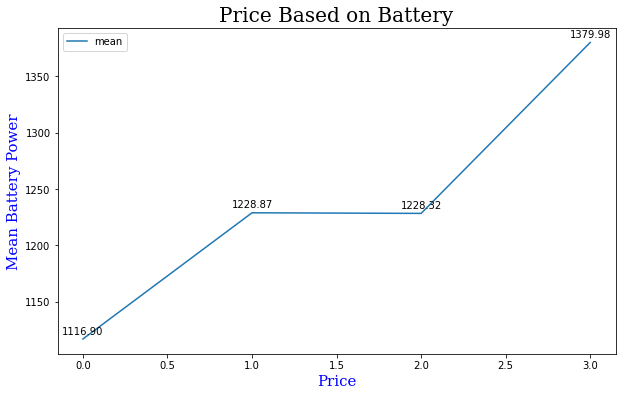

In [23]:
mean_battery.plot(figsize=(10, 6))
plt.title("Price Based on Battery", fontdict = font1)
plt.xlabel("Price", fontdict = font2)
plt.ylabel("Mean Battery Power", fontdict = font2)
for x,y in zip(mean_battery.index,mean_battery['mean']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
plt.show()

there's a similarity between 1 and 2 prices

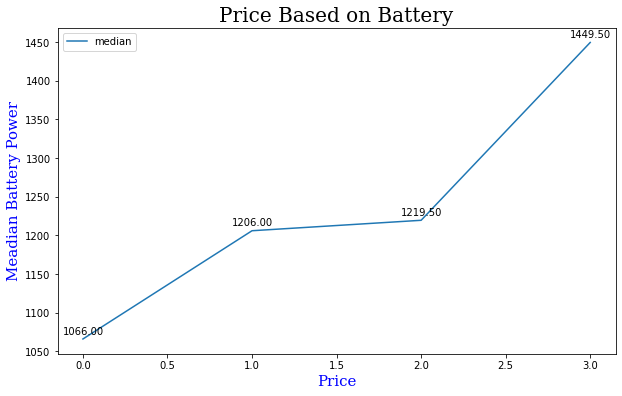

In [24]:
median_battery = df.groupby("price_range").agg(["median"])["battery_power"]
median_battery.plot(figsize=(10, 6))
plt.title("Price Based on Battery", fontdict = font1)
plt.xlabel("Price", fontdict = font2)
plt.ylabel("Meadian Battery Power", fontdict = font2)
for x,y in zip(median_battery.index,median_battery['median']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
plt.show()

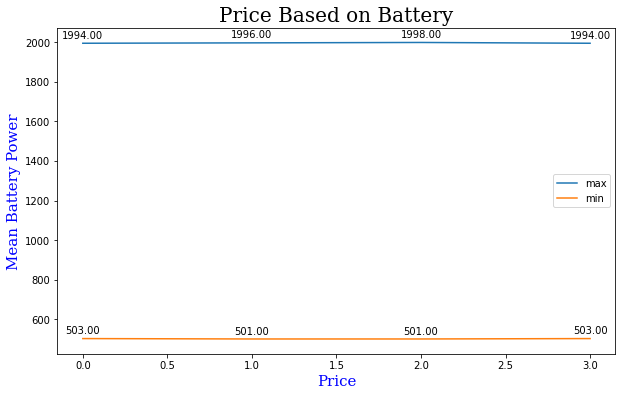

In [25]:
maxmin_battery = df.groupby("price_range").agg(["max","min"])["battery_power"]
maxmin_battery.plot(figsize=(10, 6))
plt.title("Price Based on Battery", fontdict = font1)
plt.xlabel("Price", fontdict = font2)
plt.ylabel("Mean Battery Power", fontdict = font2)
for x,y in zip(maxmin_battery.index,maxmin_battery['max']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
for x,y in zip(maxmin_battery.index,maxmin_battery['min']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
plt.show()

There's a direct relation between price and battery power

##### <a id="4.2"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">BLUETOOTH AND PRICE</h1>

In [26]:
df.blue.unique()

array([0, 1])

categorial column

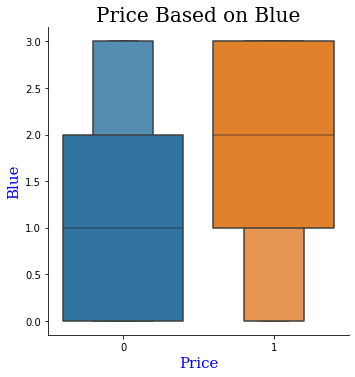

In [27]:

sns.catplot(
    data=df[['blue','price_range']].sort_values('price_range'),
    x="blue", y="price_range", kind="boxen",
)
plt.title("Price Based on Blue", fontdict = font1)
plt.xlabel("Price", fontdict = font2)
plt.ylabel("Blue", fontdict = font2)
plt.show()

if the phone is blue then the price range will be 3,2 and 1
if not the price range will be 2,1 and 0
there's a similarity between 1 and 2 prices

In [28]:
filtered = df[(df.price_range == 1) | (df.price_range == 2)][["blue","price_range",'battery_power']]

In [29]:
filtered.groupby(["blue","price_range"]).count()

battery_power
blue price_range               
0    1                      255
     2                      257
1    1                      245
     2                      243

If the phone has bluetooth the price will be higher

##### <a id="4.3"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">THE OTHER COLUMNS</h1>

In [30]:
other_columns = list(df.columns[2:])
other_columns.remove('price_range') # remove the output

In [31]:
cat_columns = [i for i in other_columns if len(df[i].unique())<=50]
num_columns = [i for i in other_columns if len(df[i].unique())>50]

In [32]:
cat_columns

['clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [33]:
num_columns

['int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

In [34]:
def plots(var,df,num_columns,cat_columns):
    #this function to plot for categorial or numerical columns
    df = df.copy()
    if var in num_columns:
        mean_var = df.groupby("price_range").agg(["mean"])[var]
        mean_var.plot(figsize=(10, 6))
        plt.title("Price Based on "+str(var), fontdict = font1)
        plt.xlabel("Price", fontdict = font2)
        plt.ylabel("Mean "+str(var), fontdict = font2)
        for x,y in zip(mean_var.index,mean_var['mean']):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,5), # distance from text to points (x,y)
                         ha='center') # horizontal alignment
        plt.show()
    elif var in cat_columns:
        sns.catplot(data=df[[var,'price_range']].sort_values('price_range'),x=var, y="price_range", kind="boxen")
        plt.title("Price Based on "+str(var), fontdict = font1)
        plt.xlabel(var, fontdict = font2)
        plt.ylabel("Price", fontdict = font2)
        plt.show()

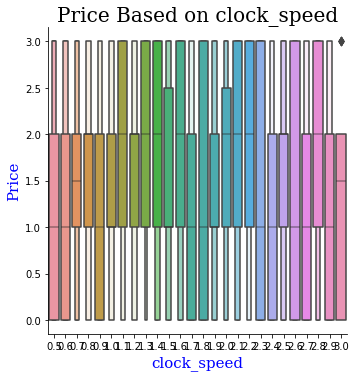

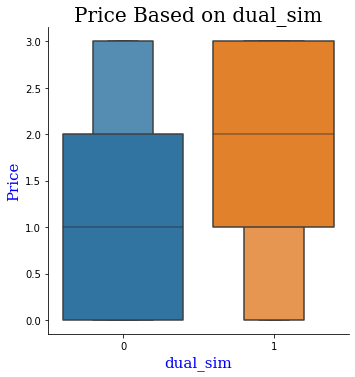

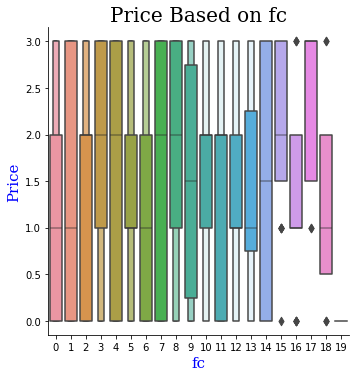

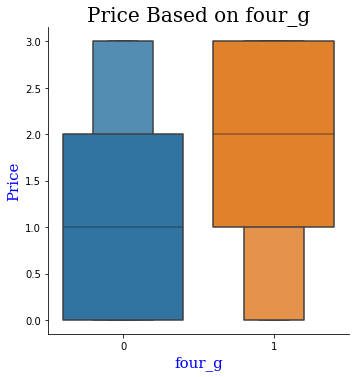

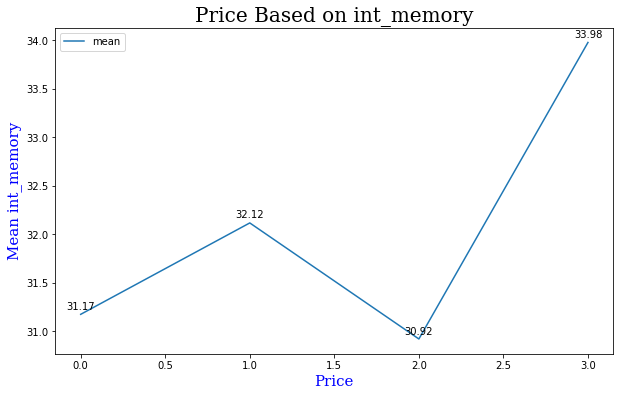

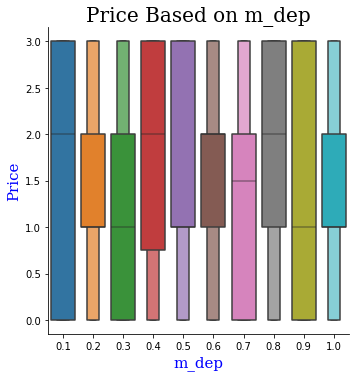

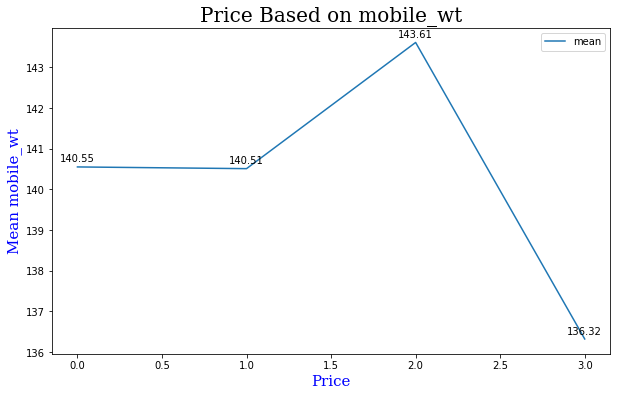

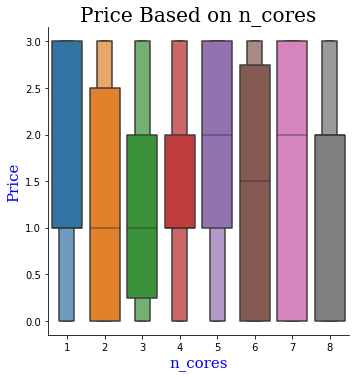

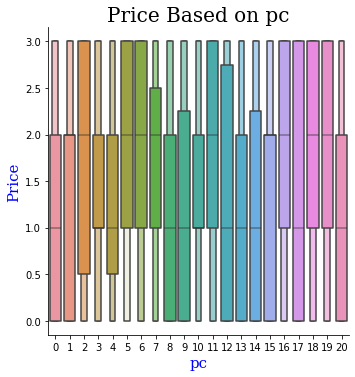

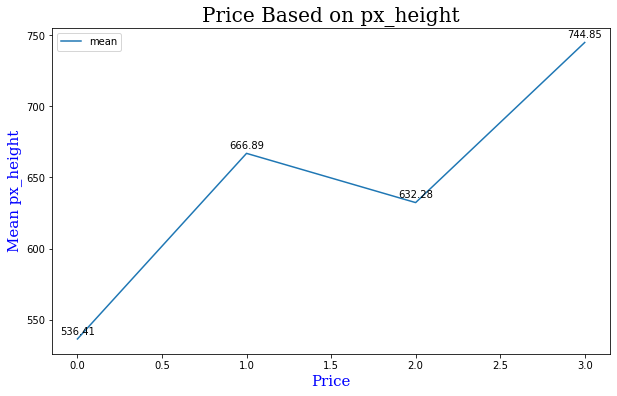

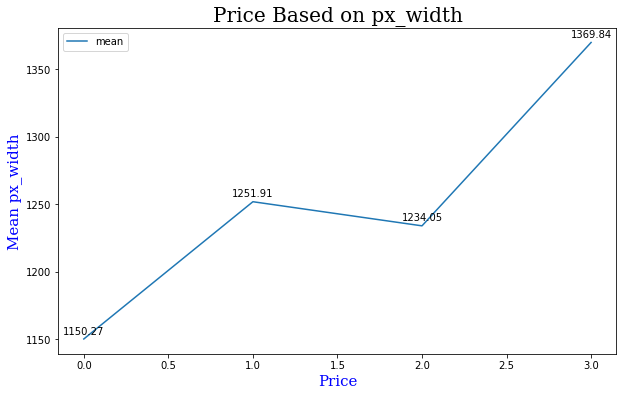

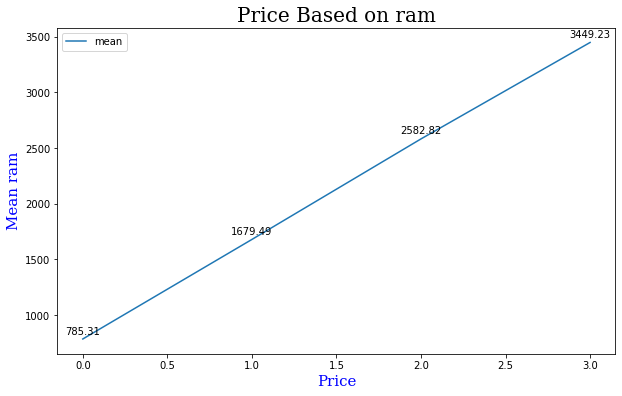

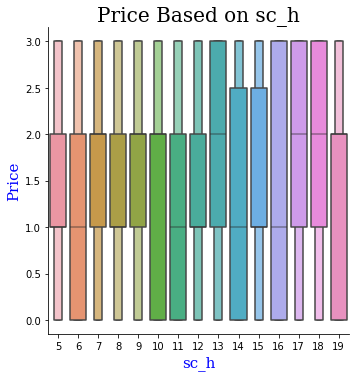

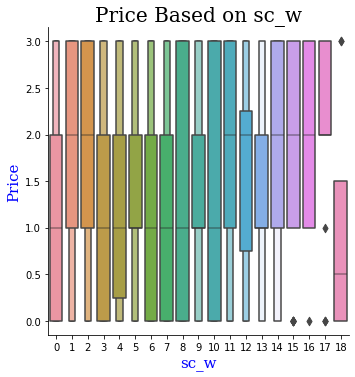

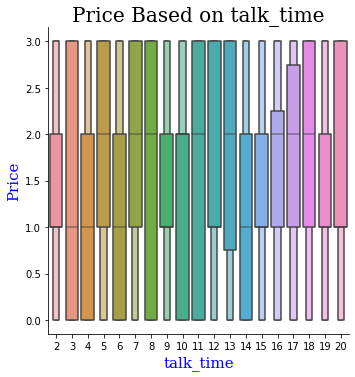

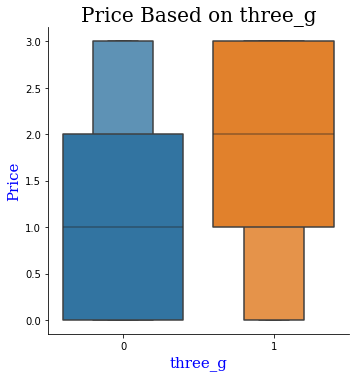

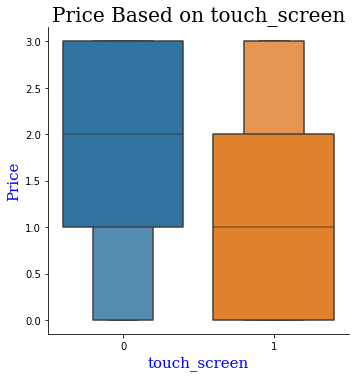

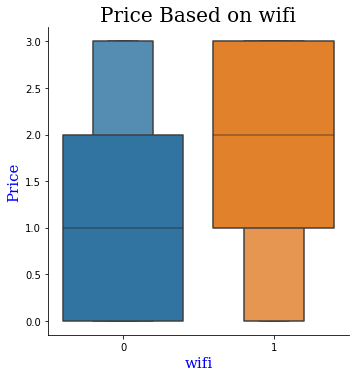

In [35]:
# Time to plot
for i in other_columns:
    plots(i,df,num_columns,cat_columns)

> * For clock speed, mobile depth ,primary camera and Screen Height of mobile, there's no relationship between them and price but all types have most the phone lies on low and high cost
> * For dual sim, if the phone has this feauture its price will be high
> * For front camera mega pixel most of phone lies on low and high prices but phones with 15 and 17 megapixel has high price
> * If the phone has 4G its price will be high
> * If the internal memory is high the price will be high
> * If the mobile weigh is low the price will be high
> * For mobilephone that has 1 and 5 core its price is high, 2,3 and 6 cores has low price
> * If the Pixel Resolution Height is high the price will be high
> * If the Pixel Resolution Width is high the price will be high
> * If the RAM is high the price will be high
> * For Screen Width most of phone lies on low and high prices but phones with 17cm screen width has high price and 18cm has low price
> * phones with high talk time has very high price although most phone lies on high and low prices
> * If the phone has 3G its price will be high
> * If the phone has touch screen its will be low
> * If the phone has wifi its price will be high

##### <a id="4.4"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">FEATURE COMBINATION</h1>

In [36]:
combined_columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
other_columns = list(df.columns)
for i in combined_columns:
    other_columns.remove(i) 
other_columns.remove("price_range")
output = 'price_range'

In [37]:
def comb_plot(var1,var2,df):
    df = df.copy()
    fig, ax1 = plt.subplots(nrows=1, figsize=(16,12))
    s = sns.boxplot(ax = ax1, x="price_range", y=var1, hue=var2,data=df, palette="PRGn",showfliers=True)
    plt.show()

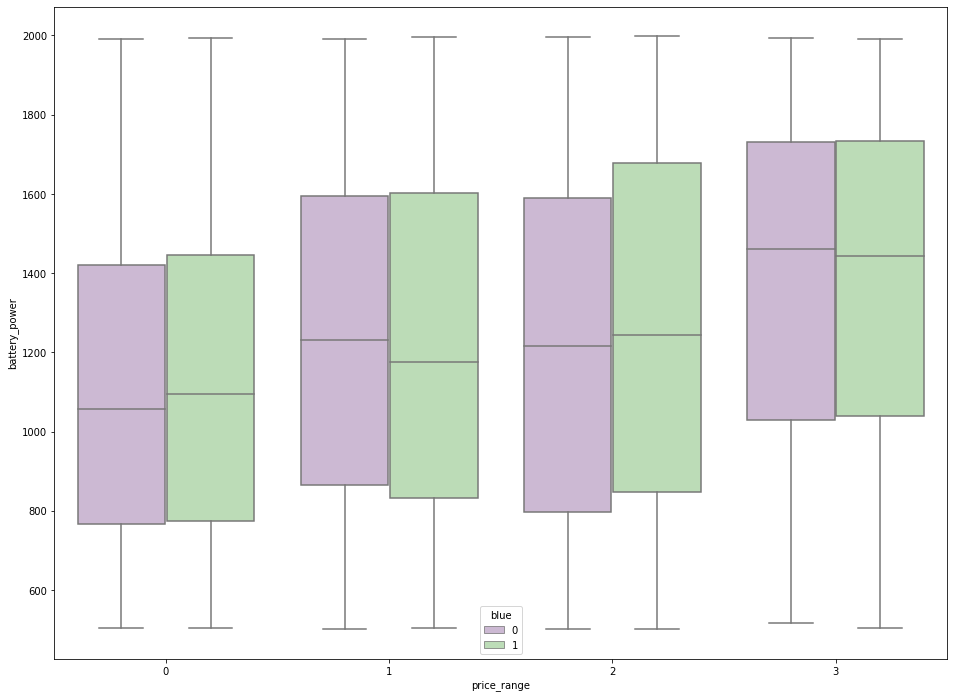

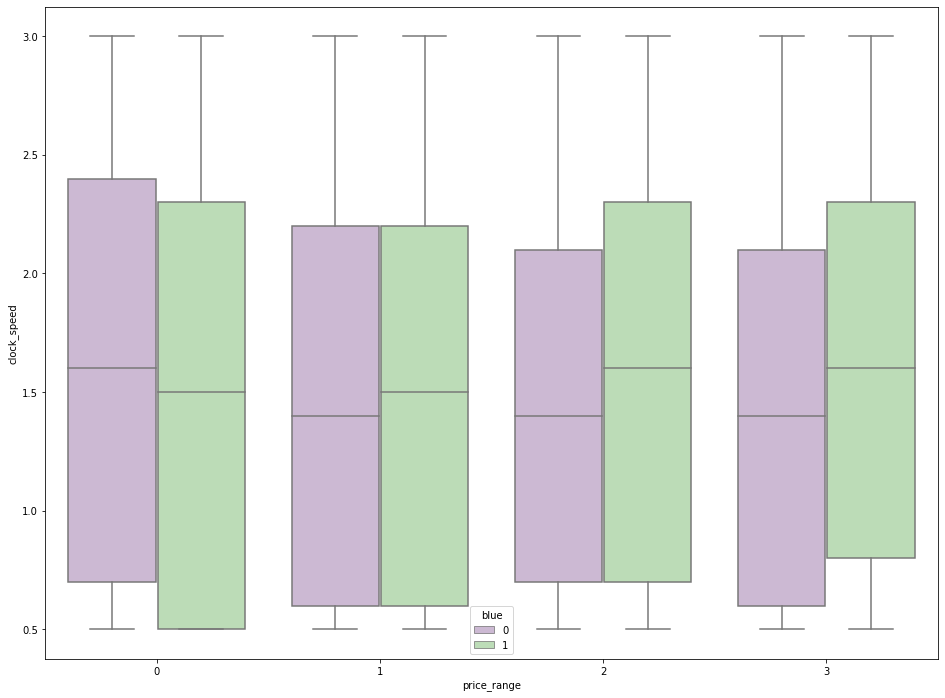

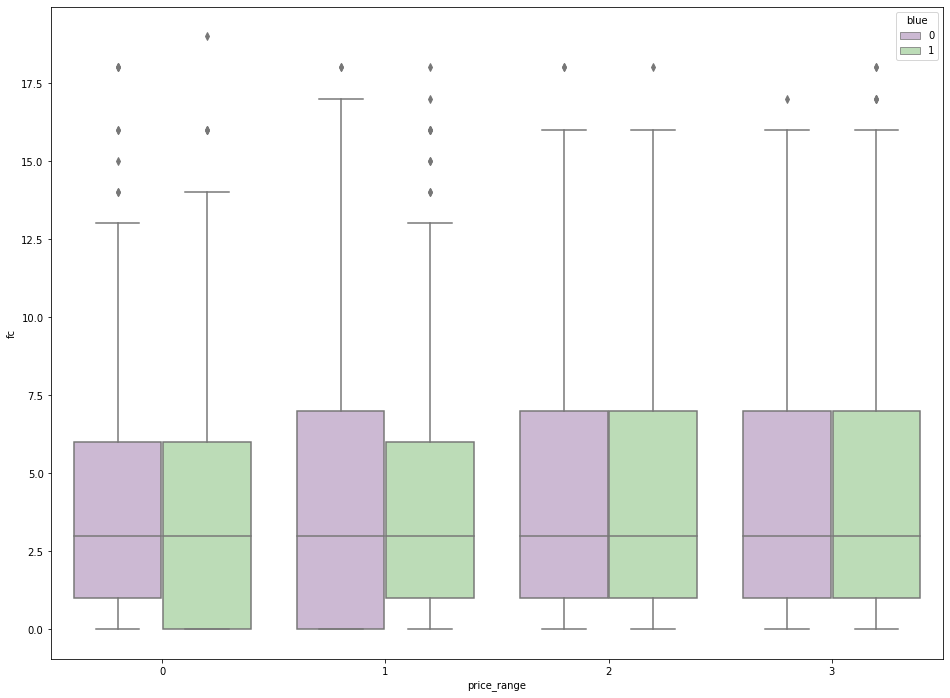

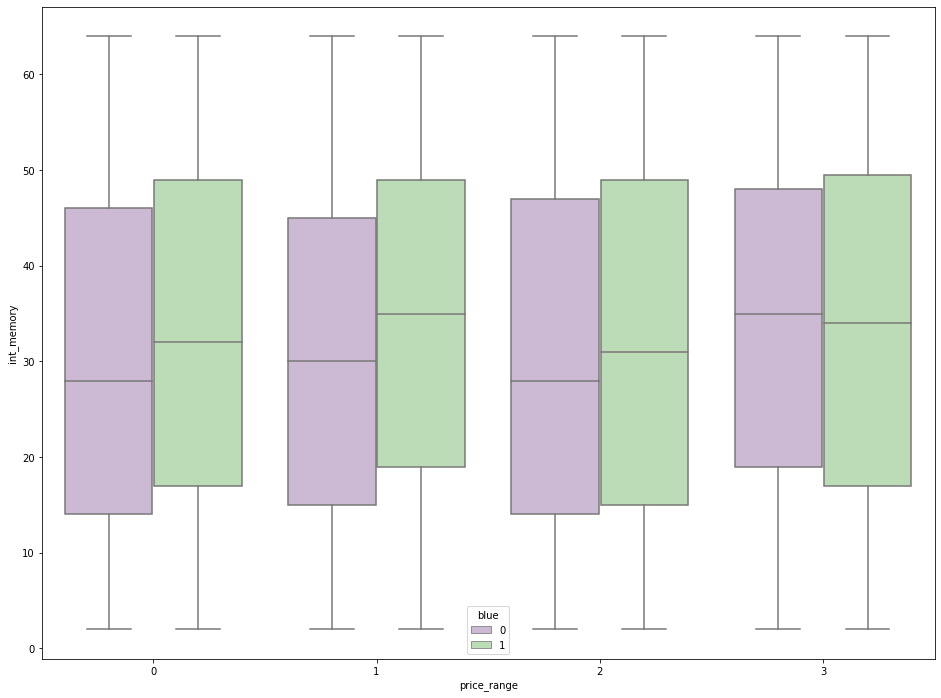

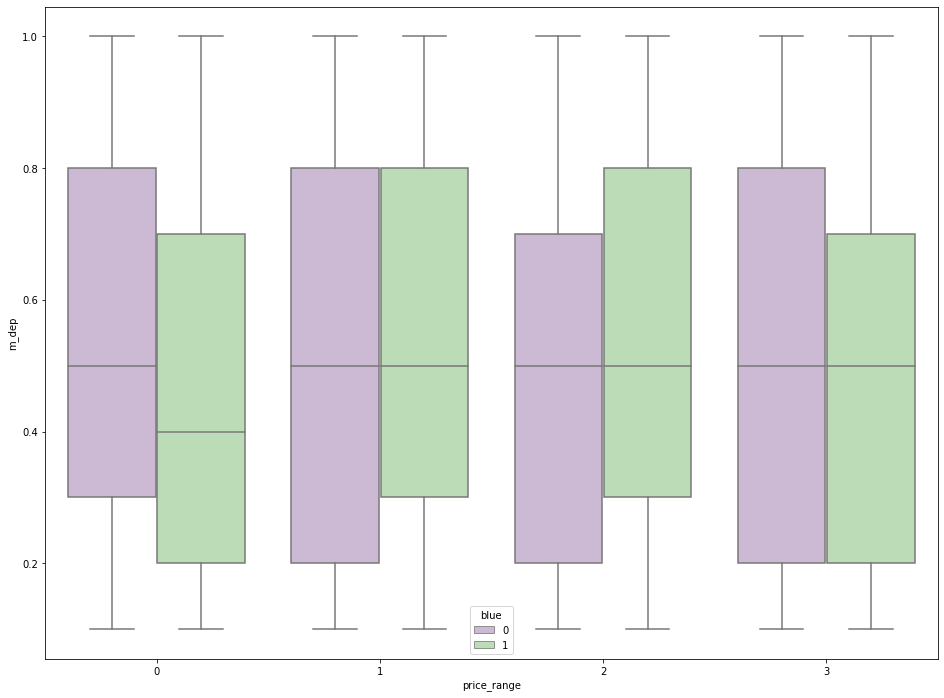

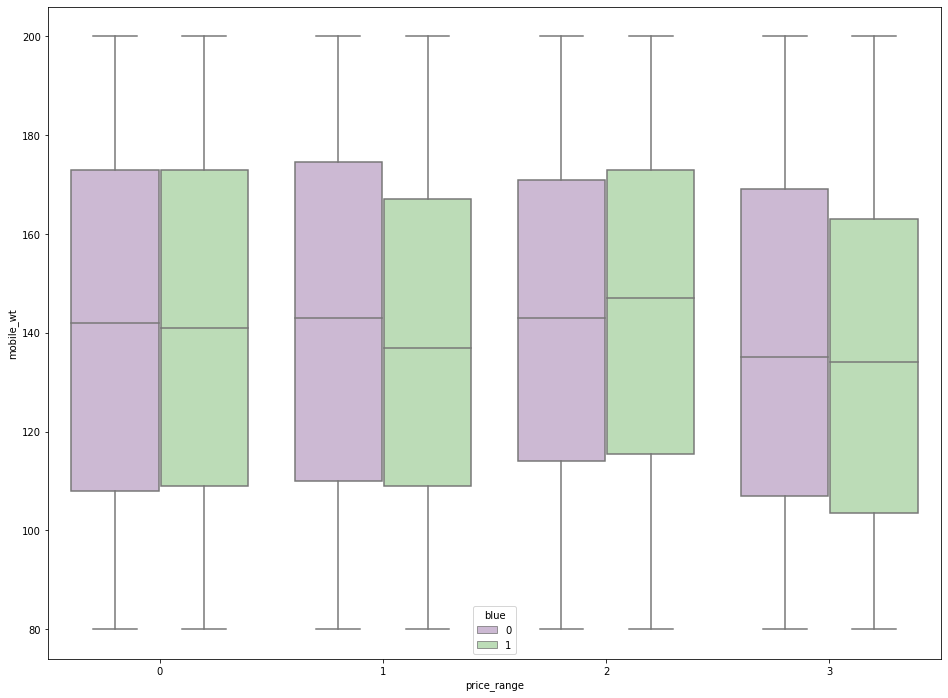

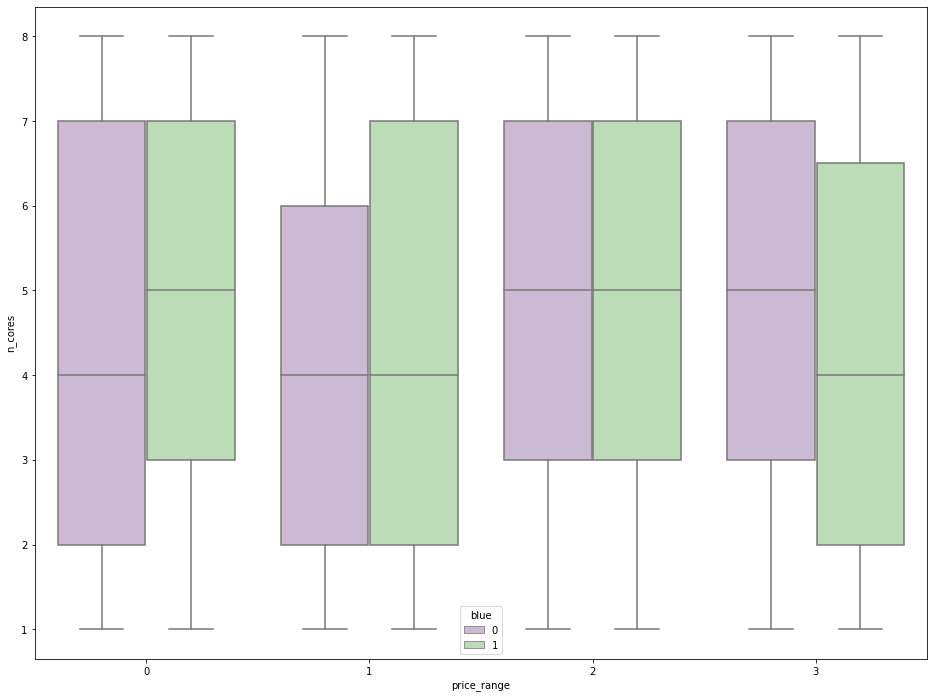

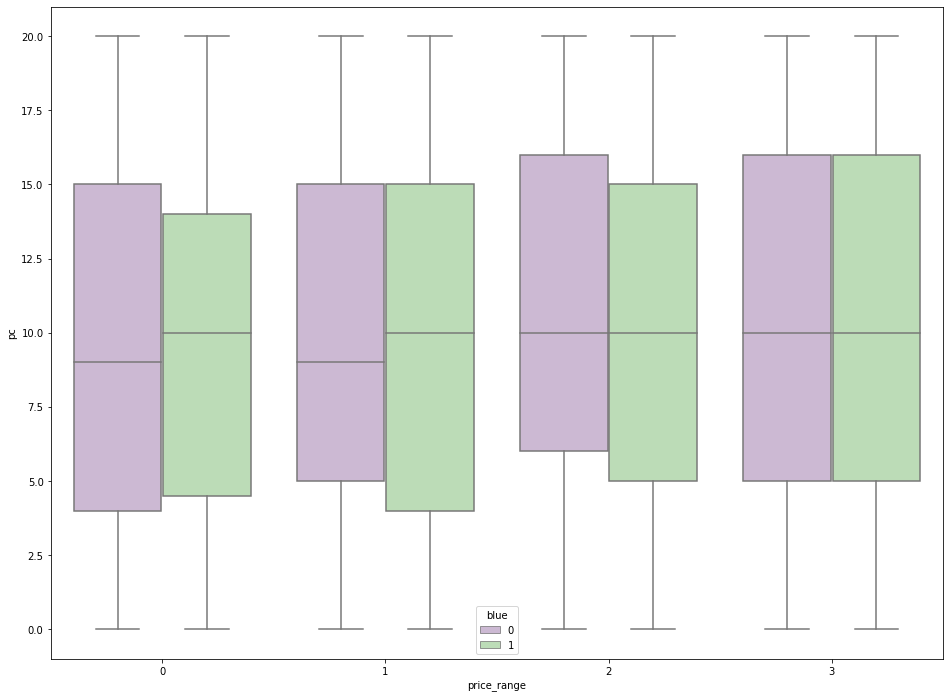

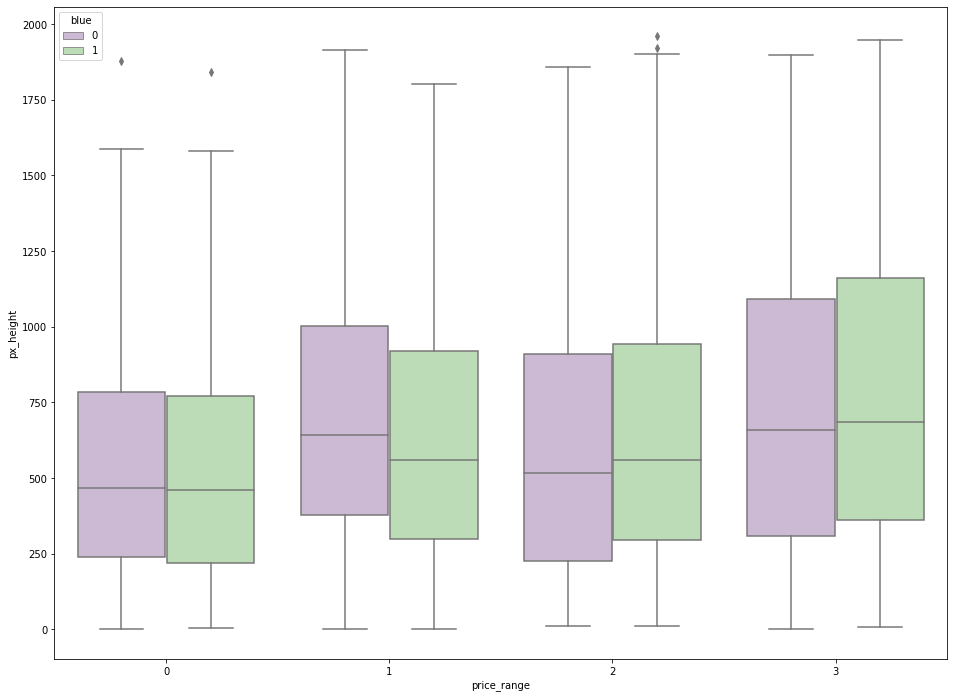

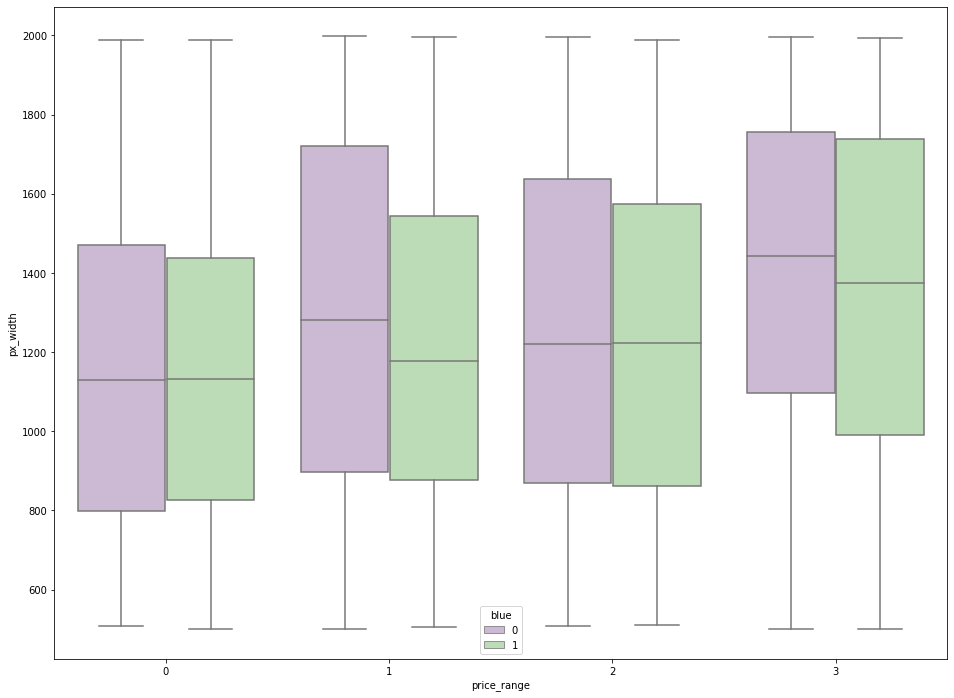

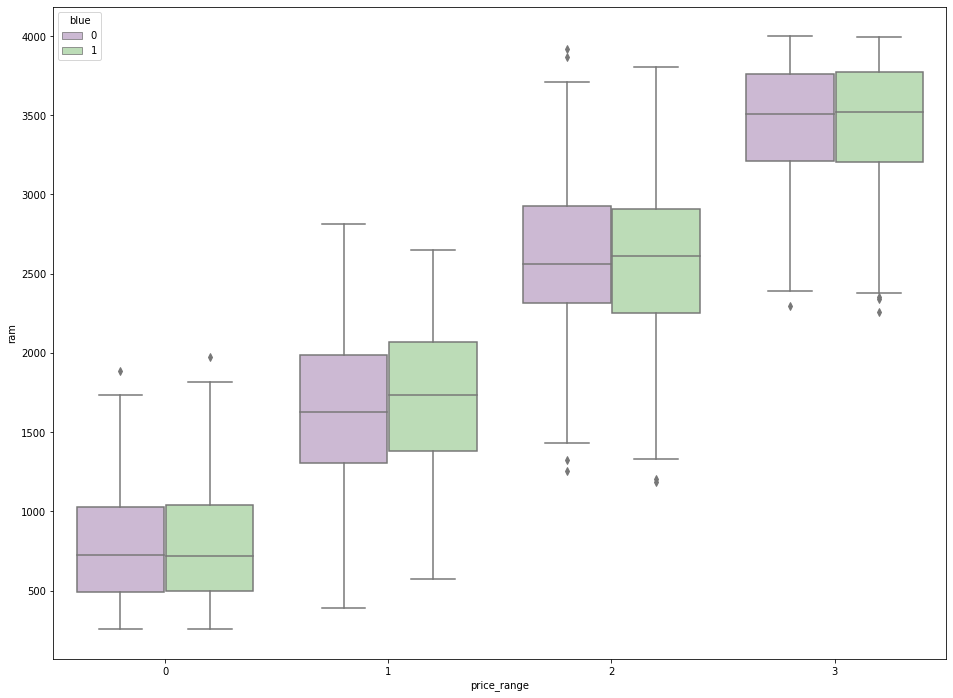

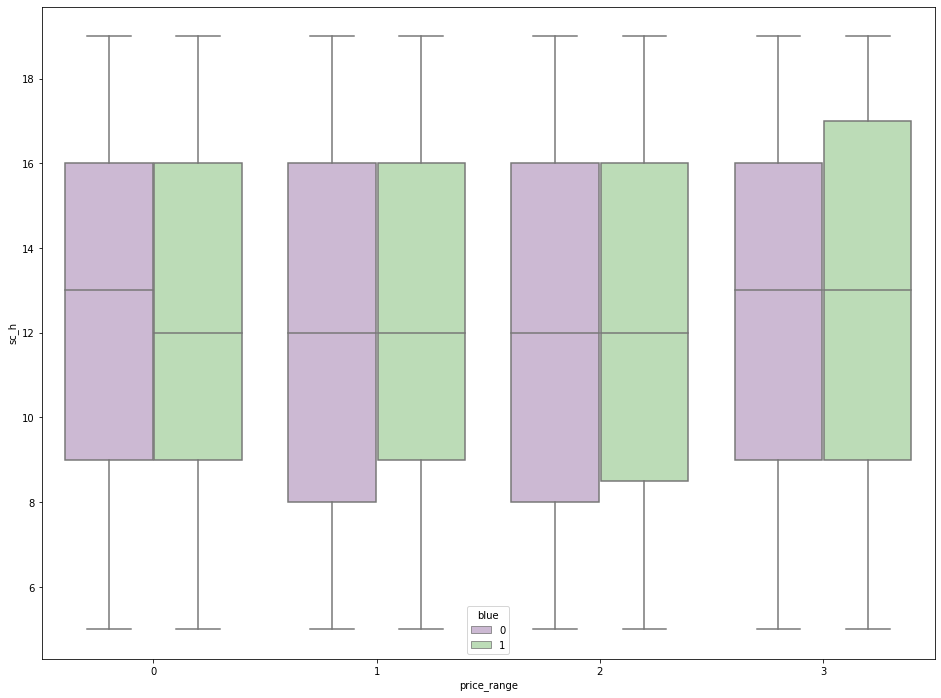

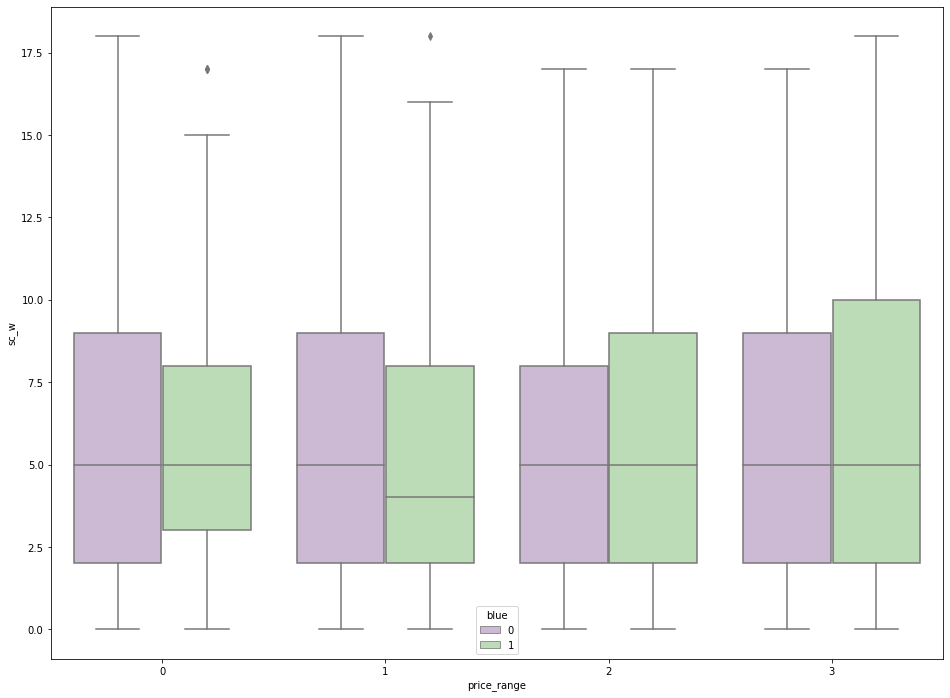

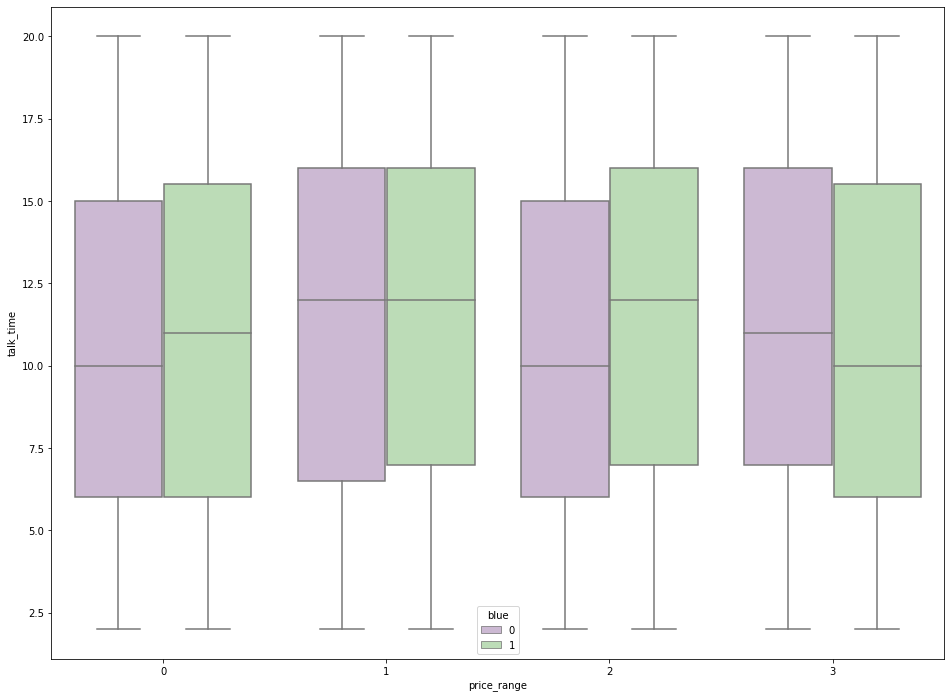

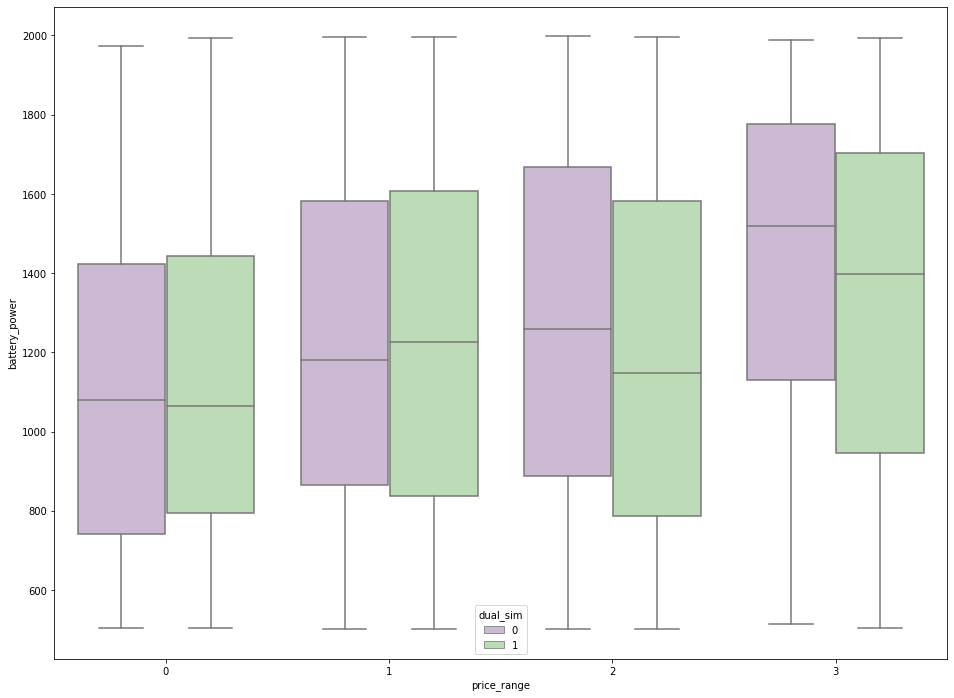

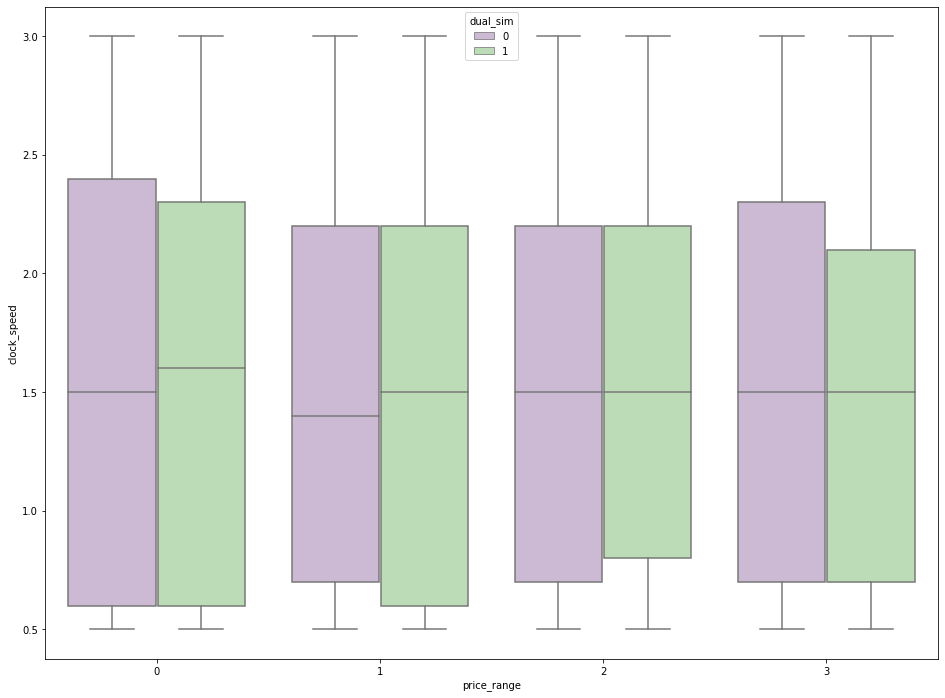

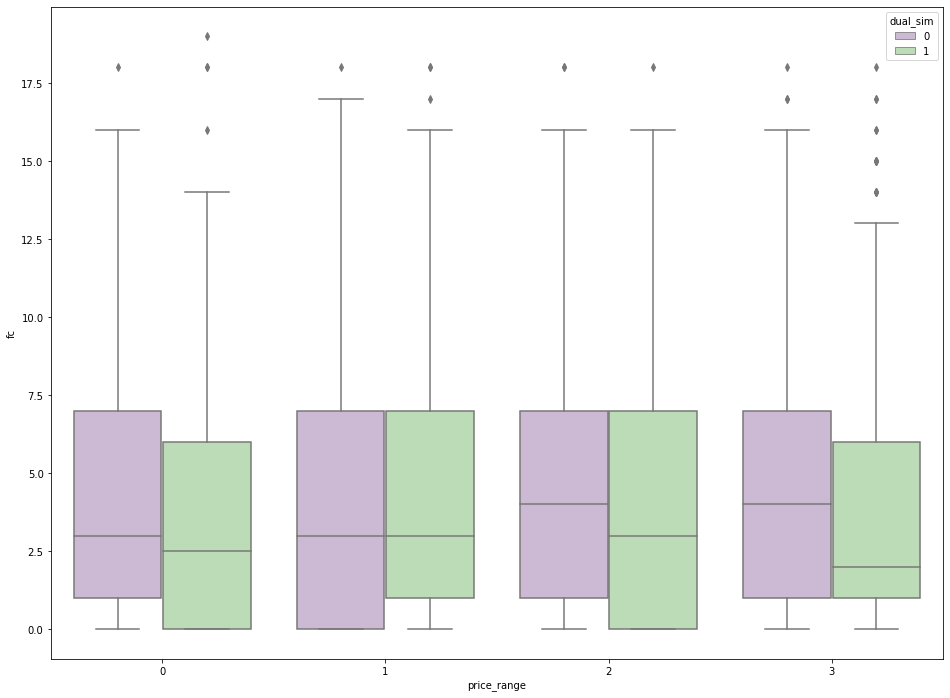

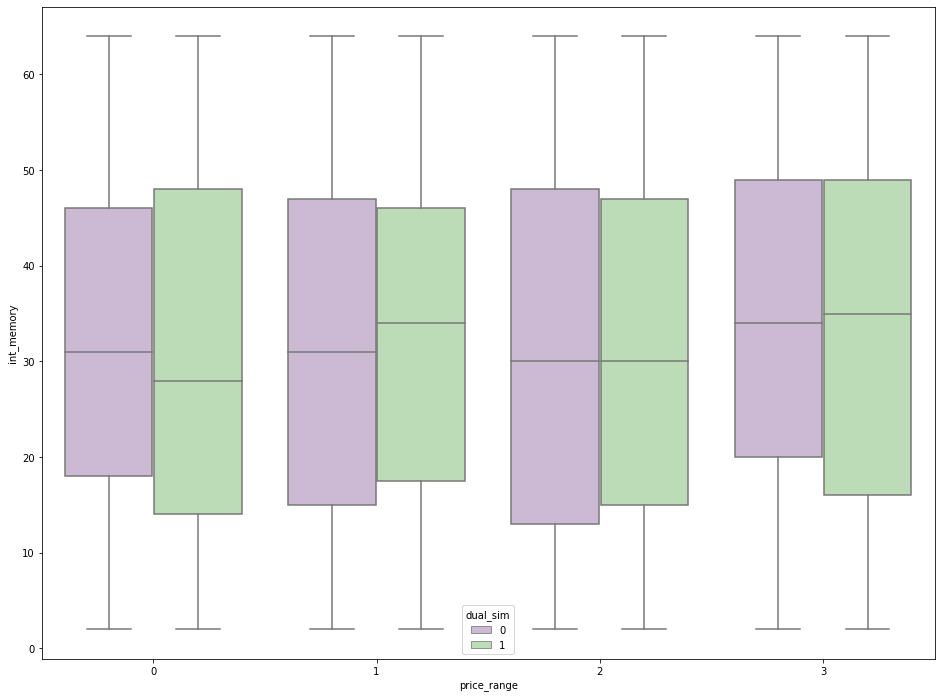

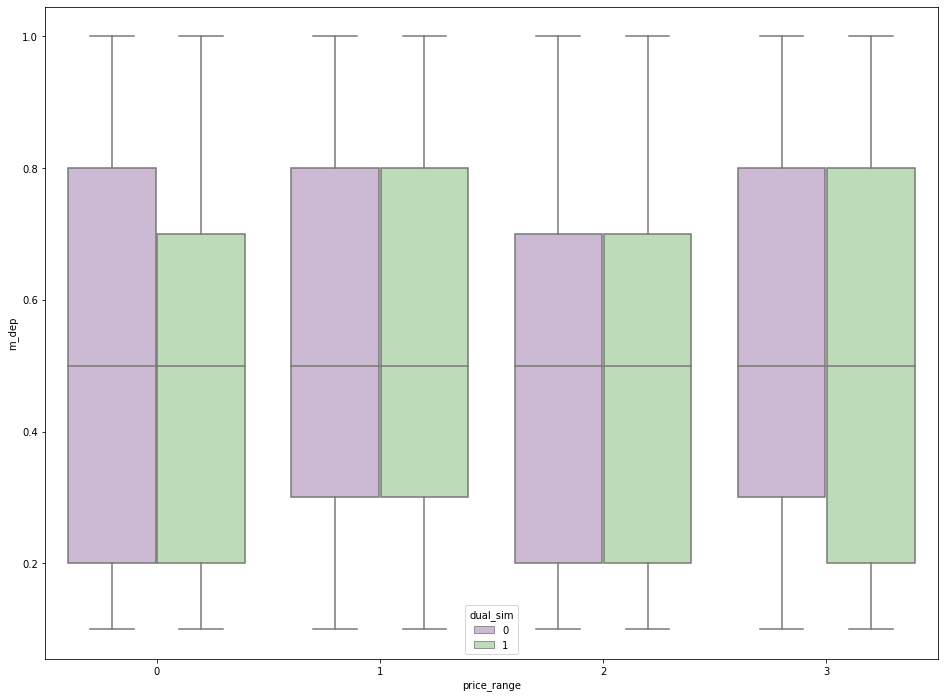

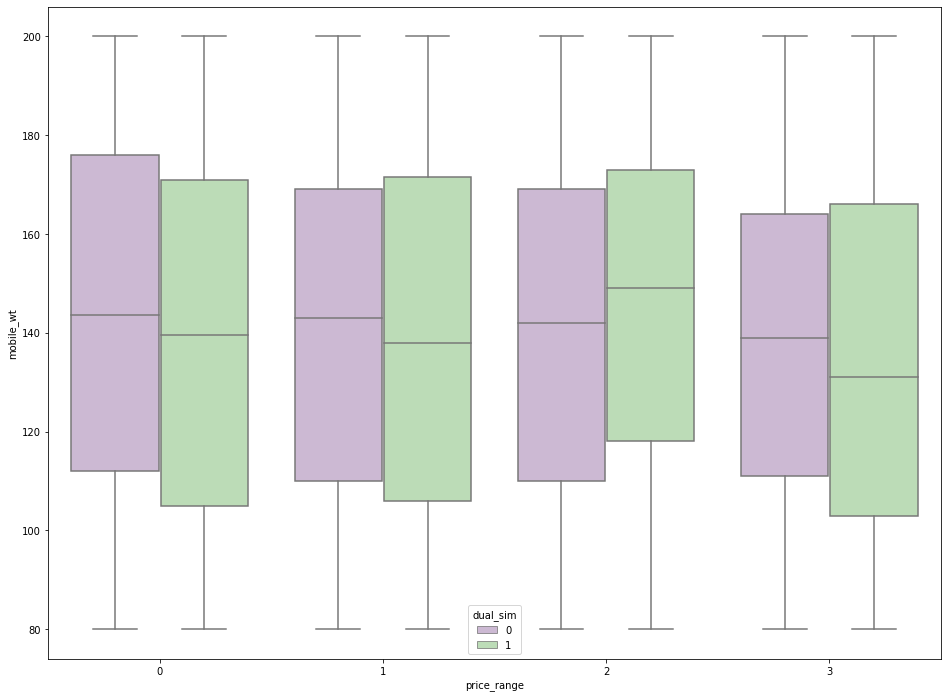

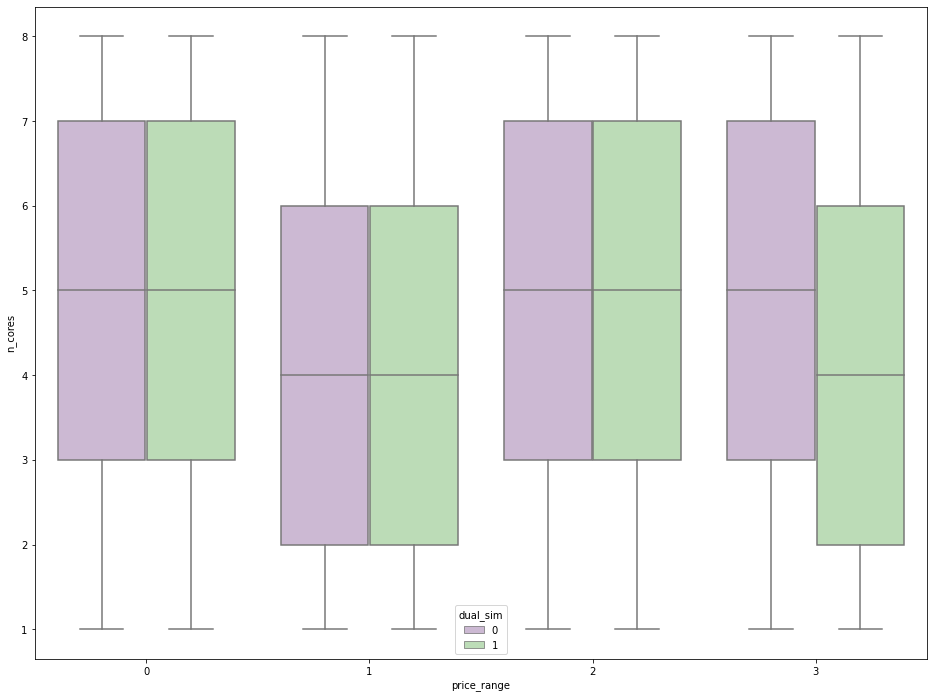

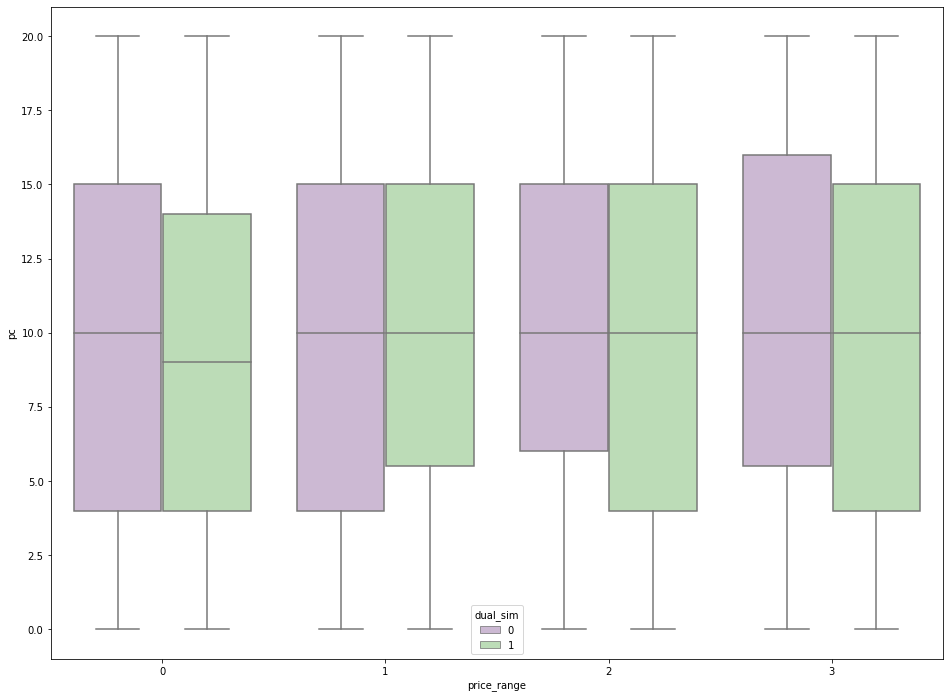

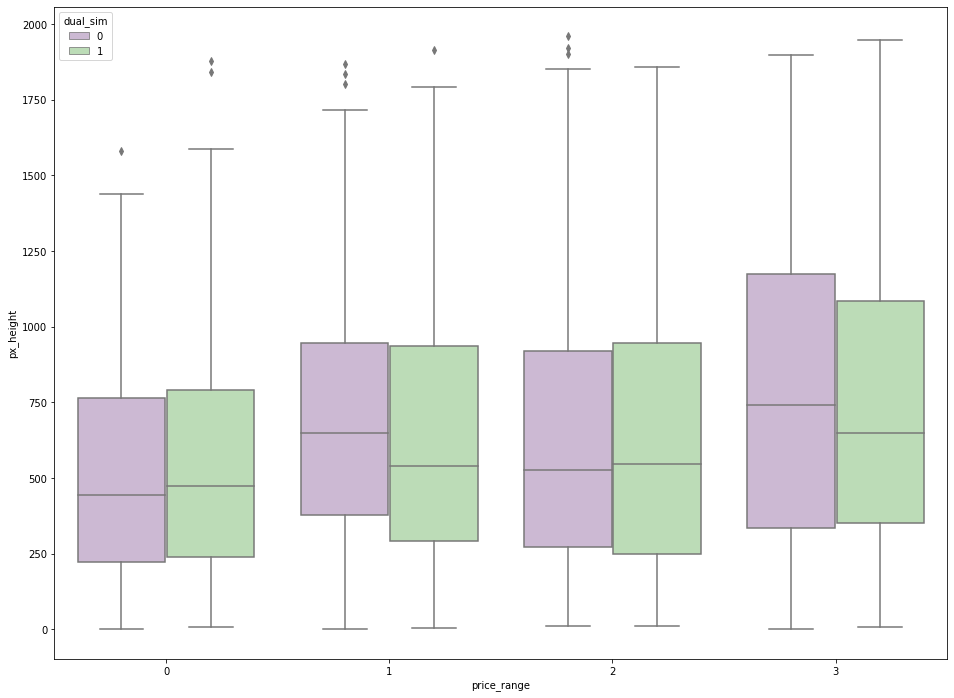

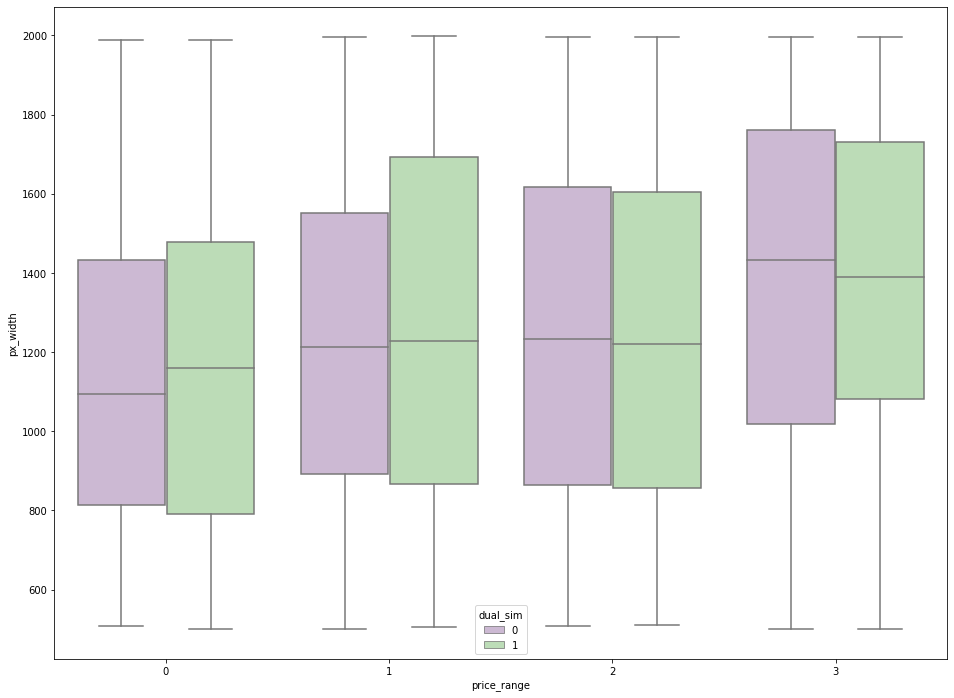

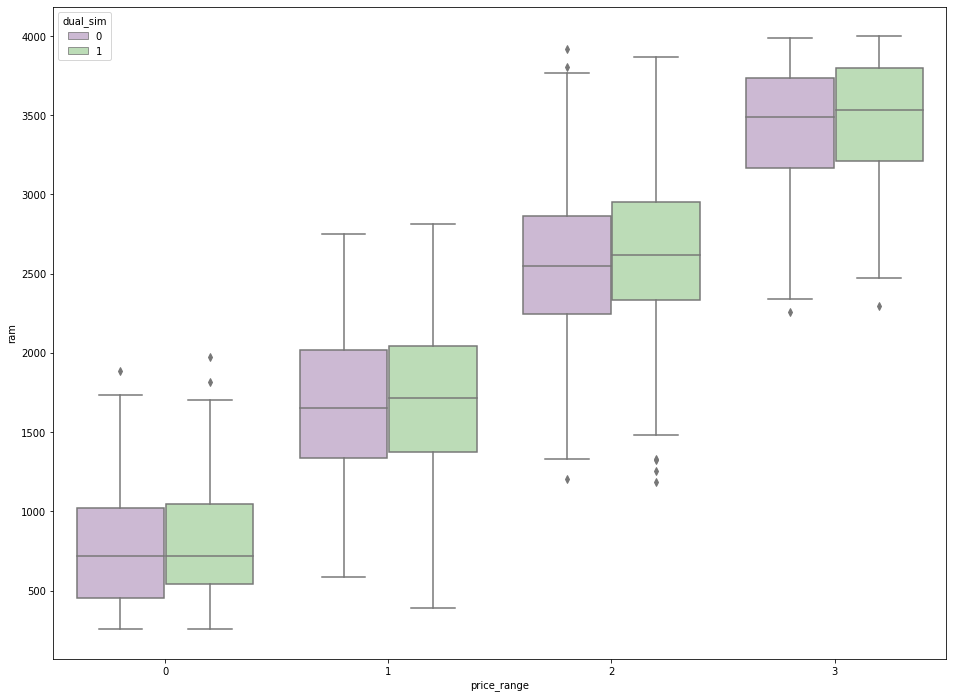

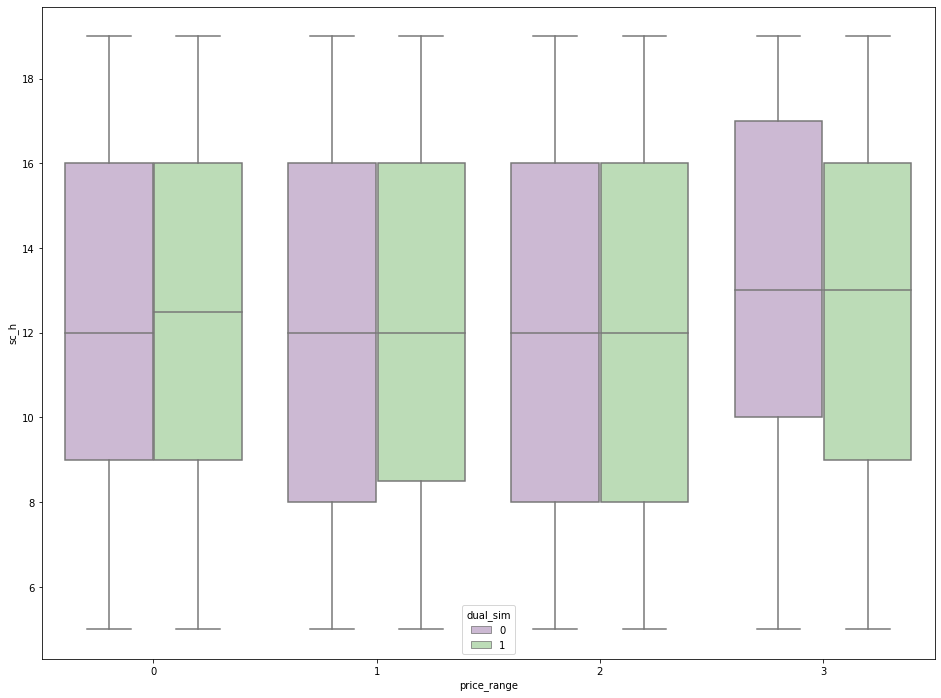

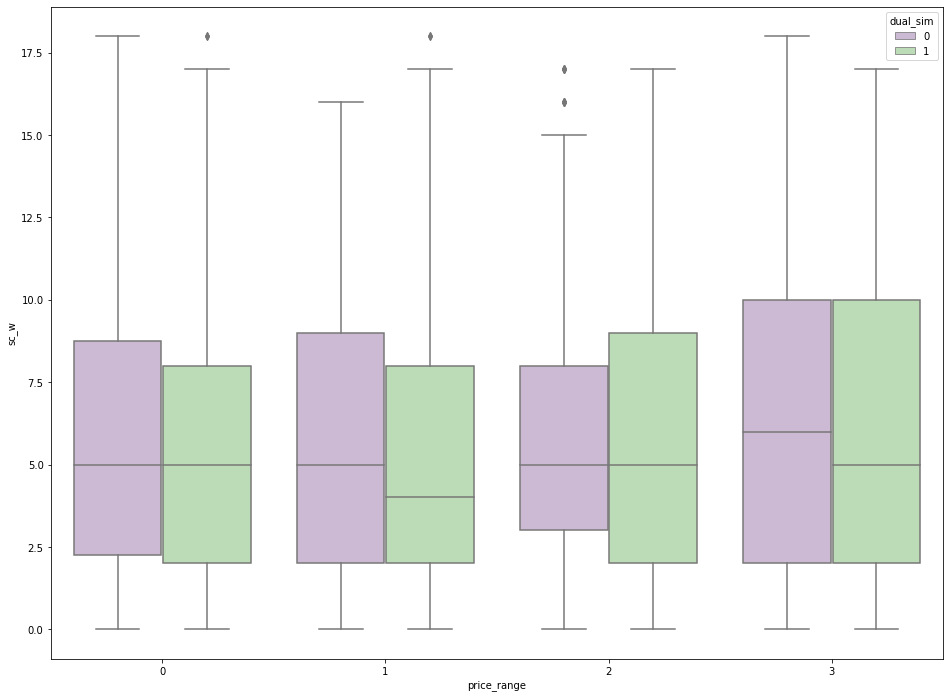

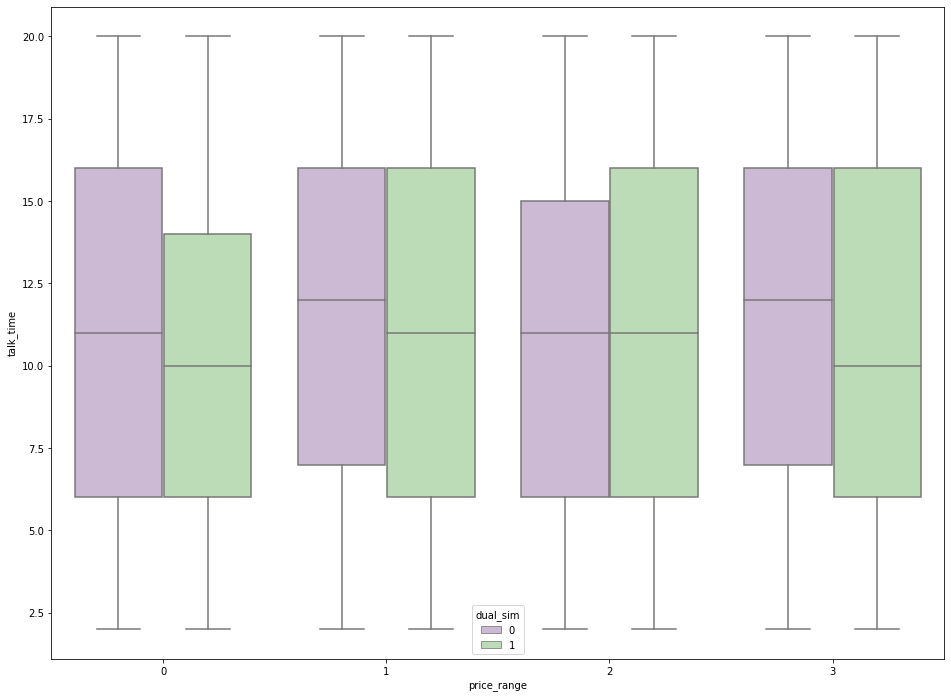

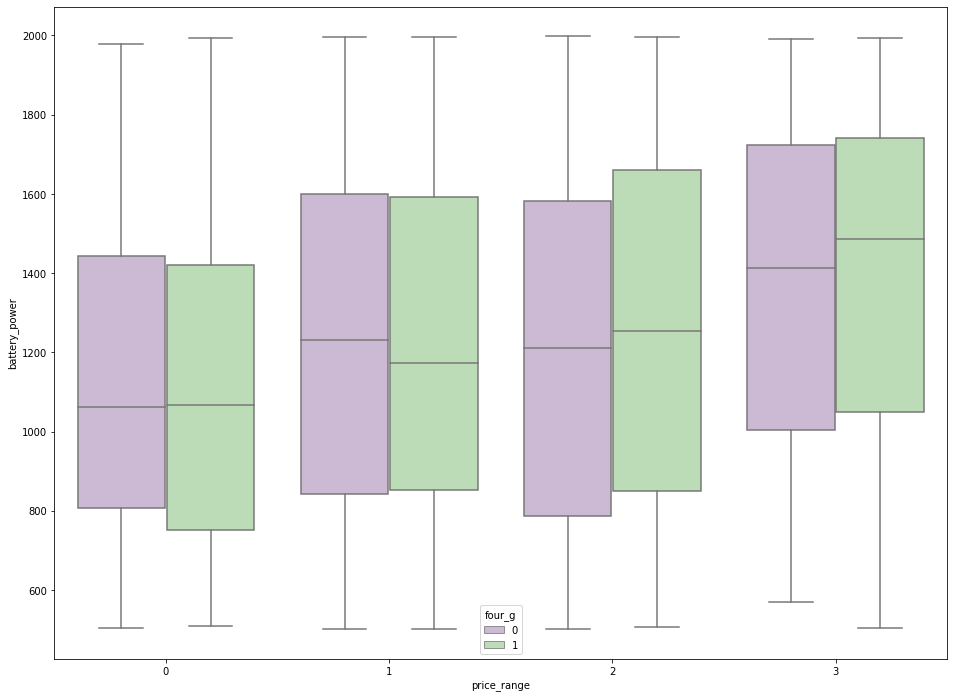

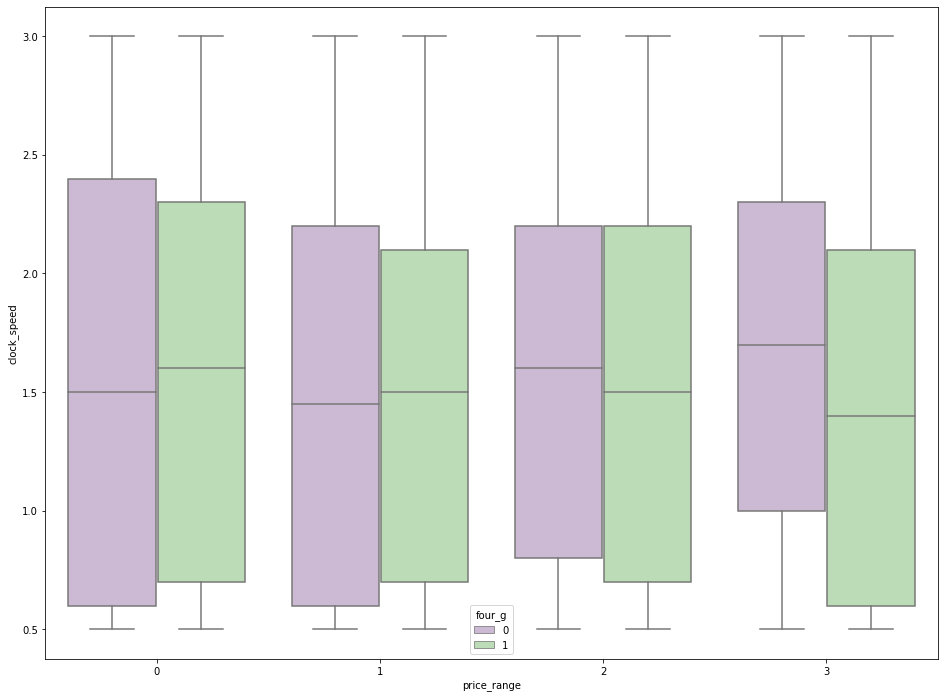

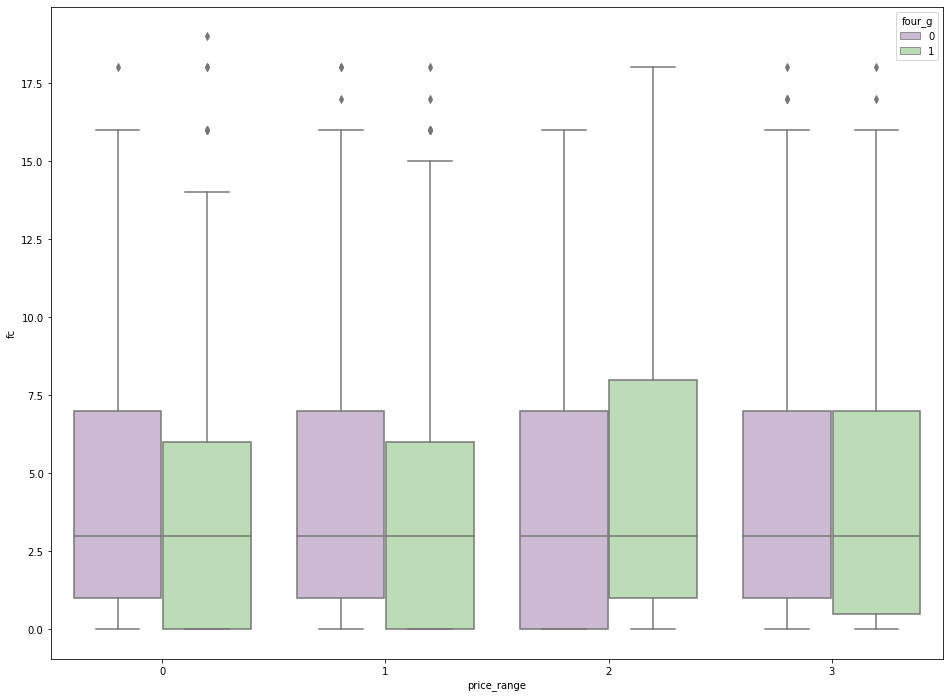

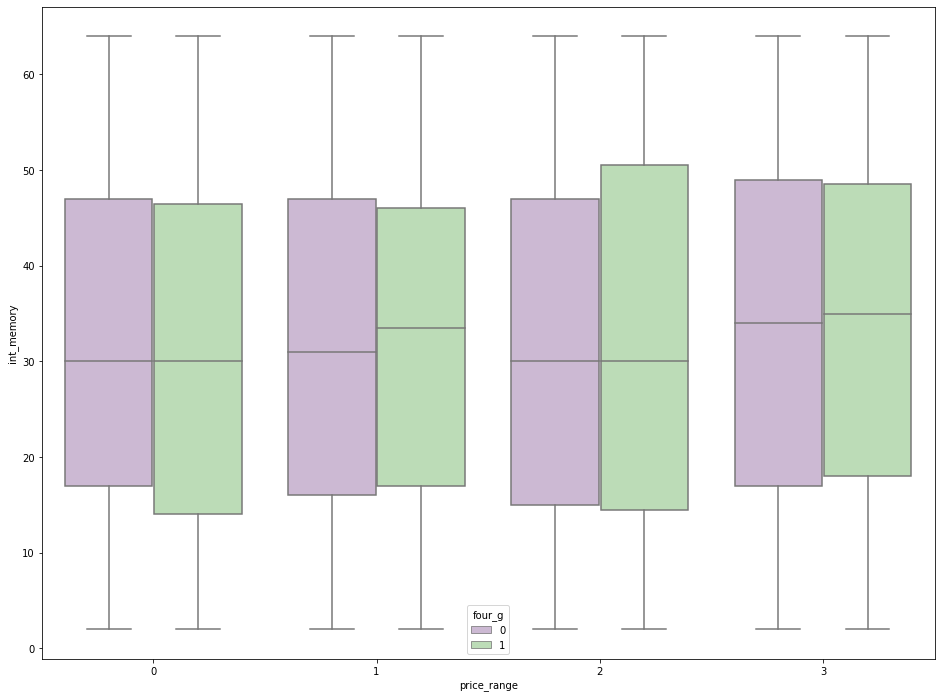

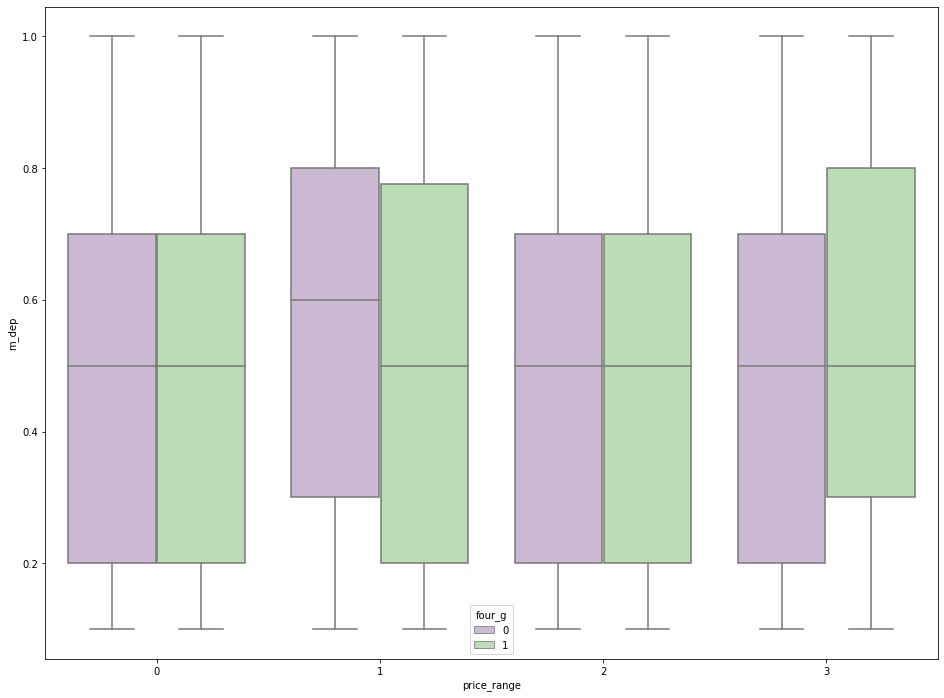

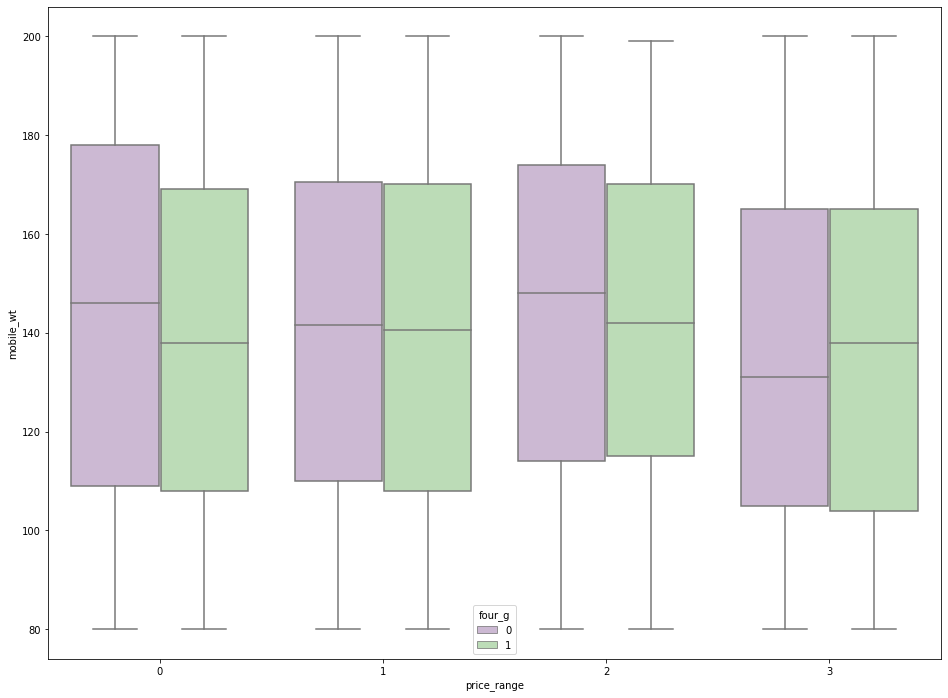

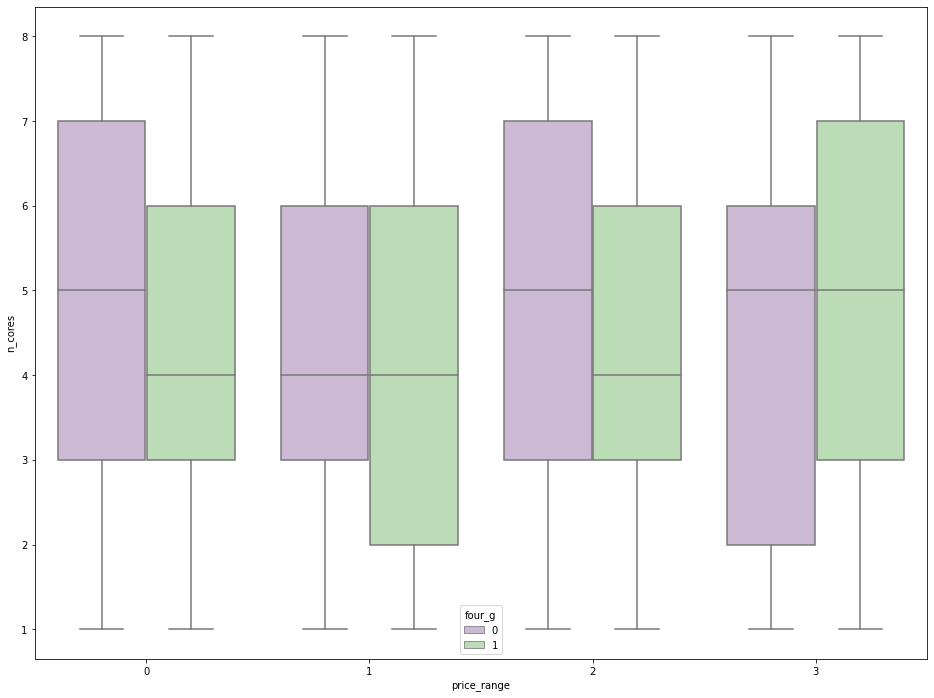

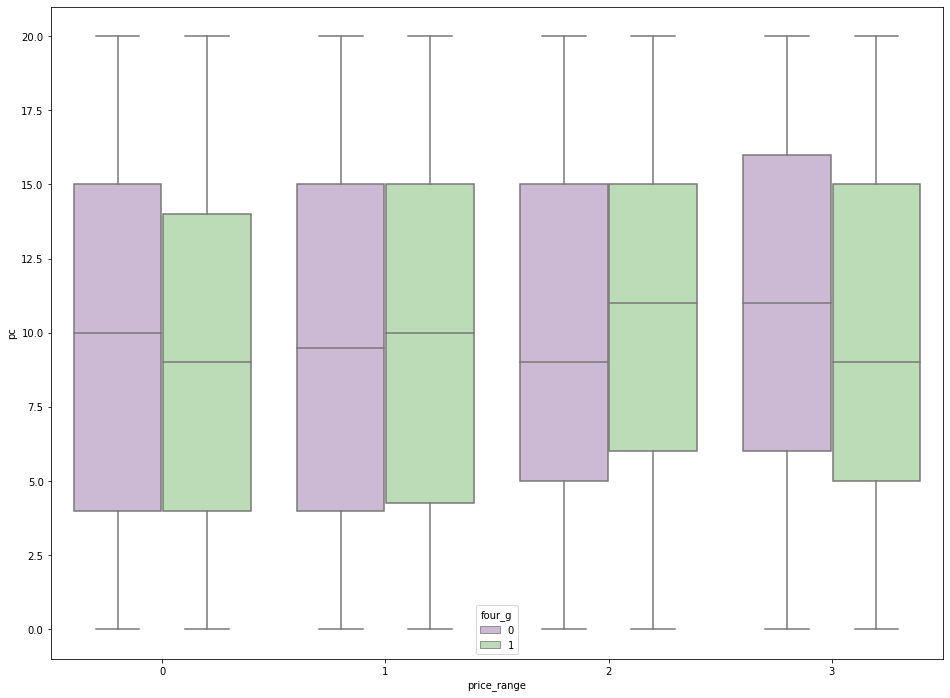

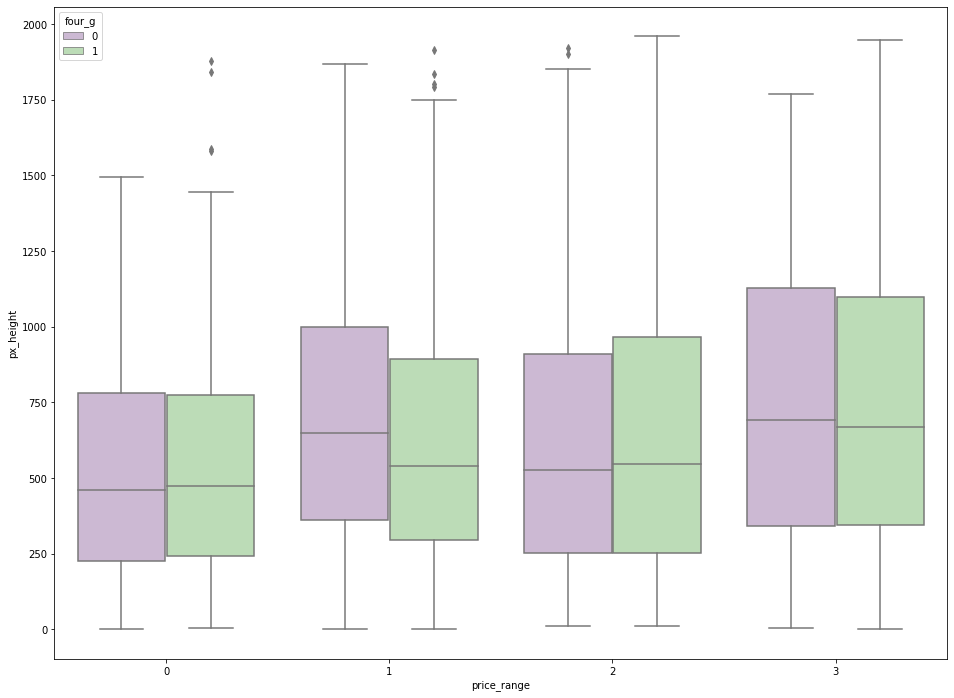

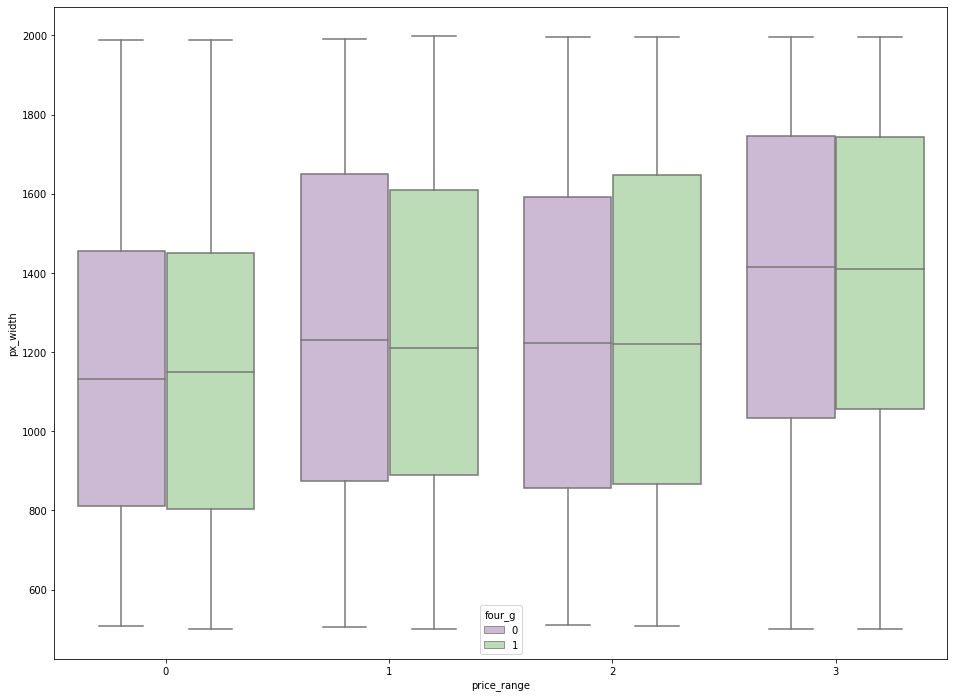

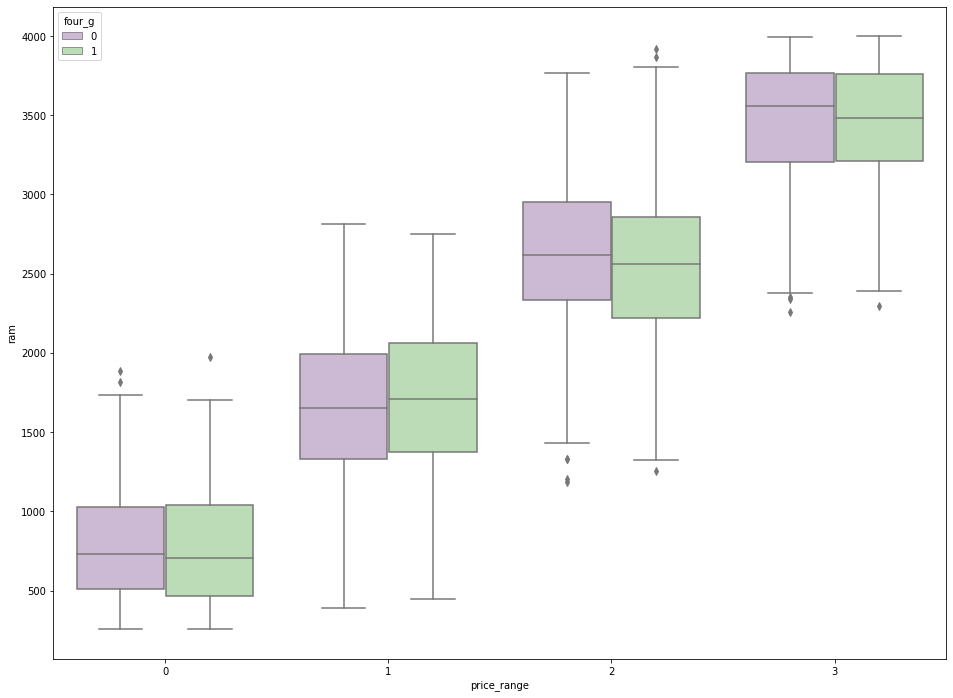

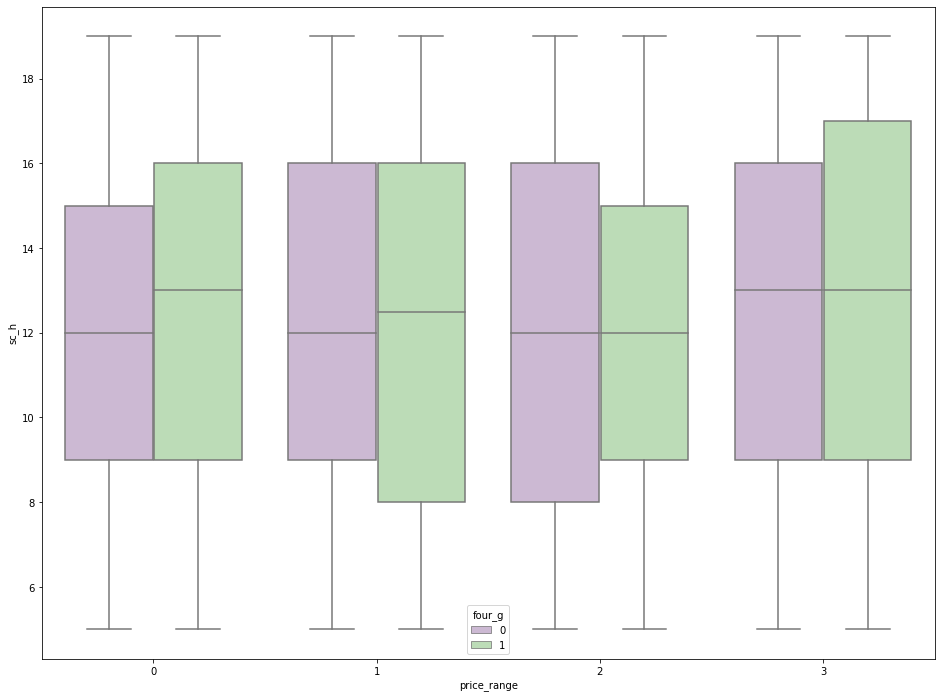

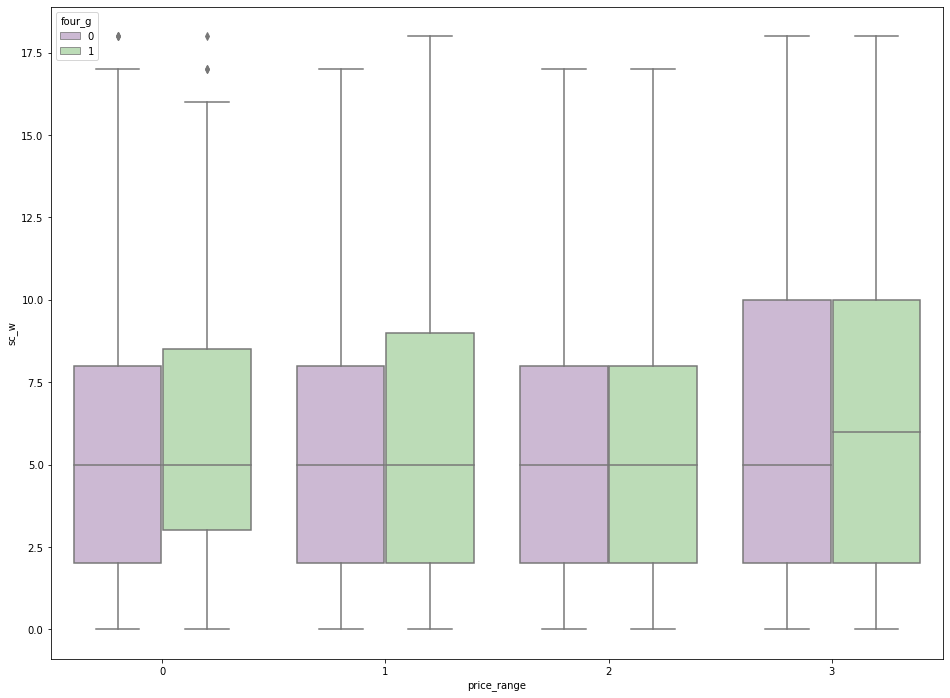

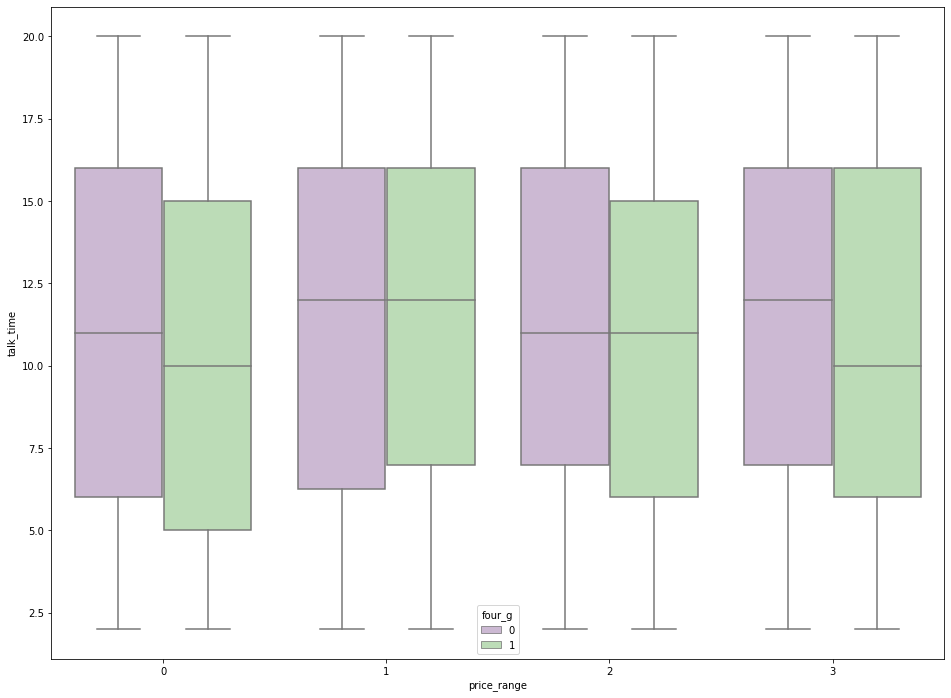

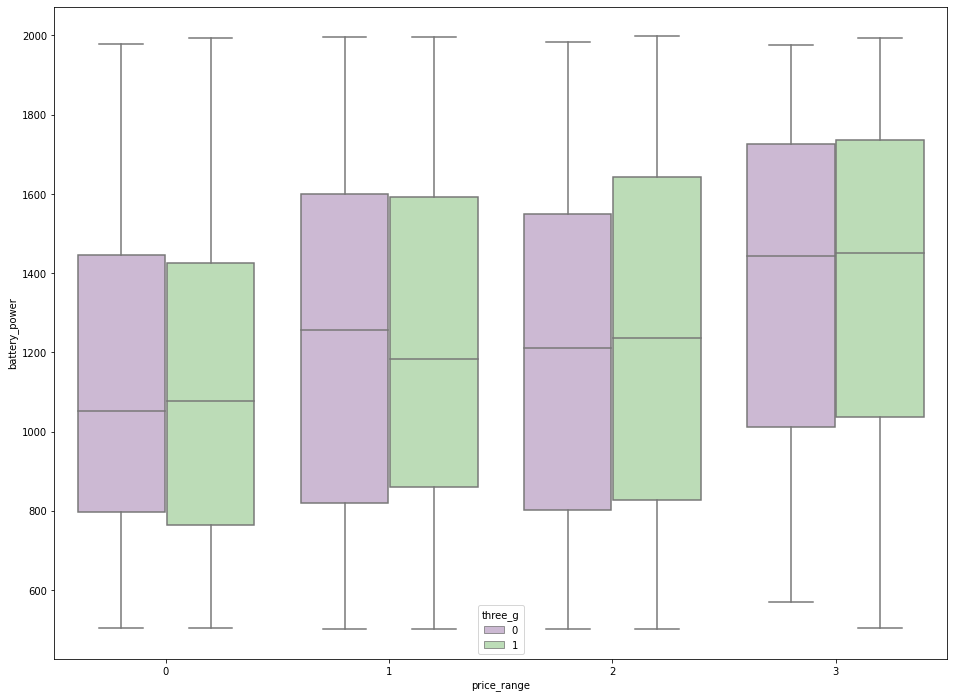

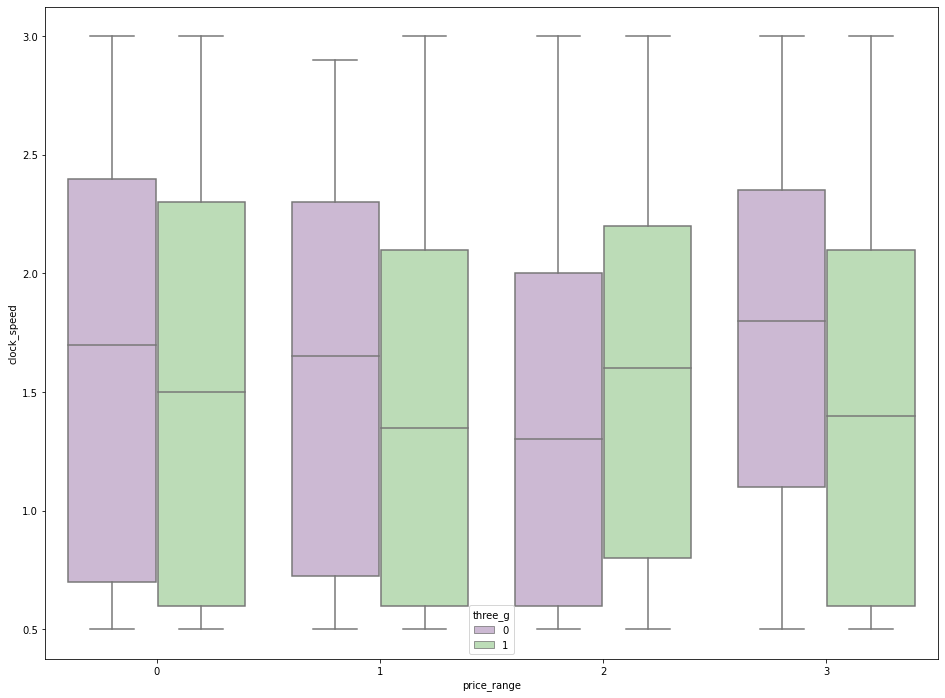

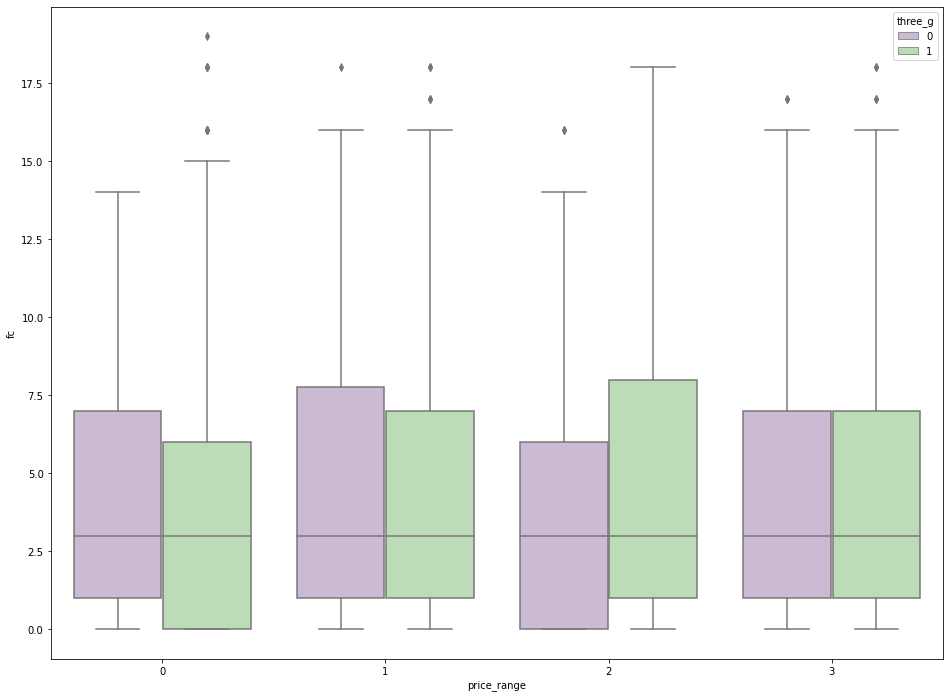

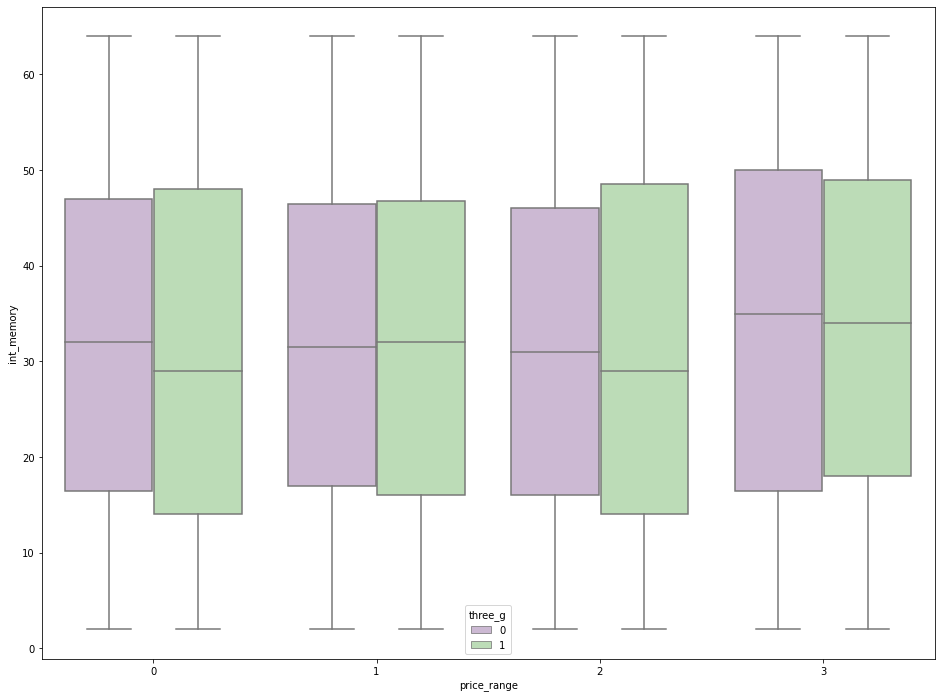

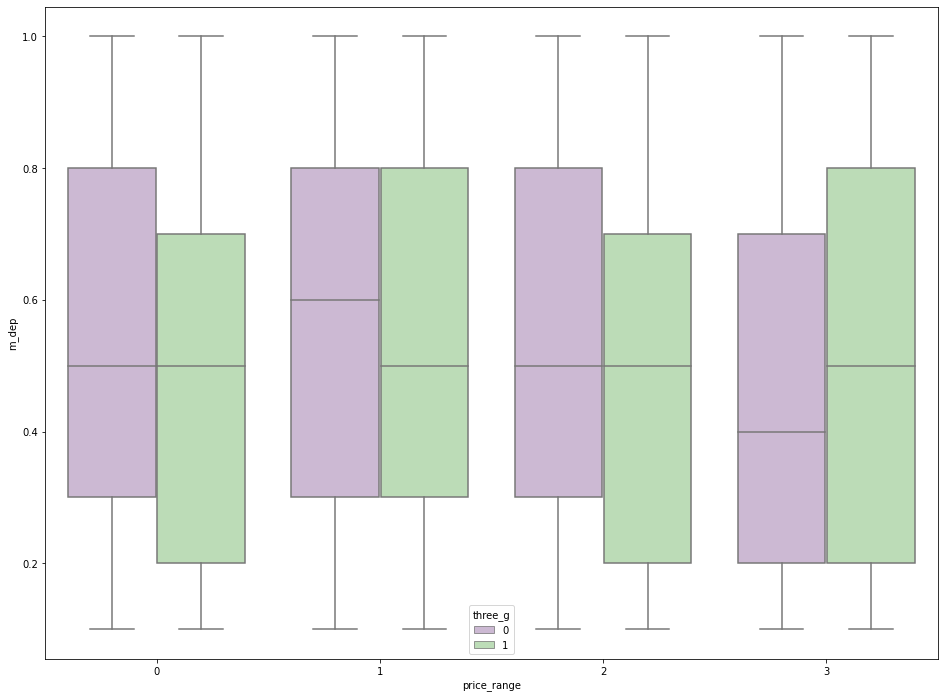

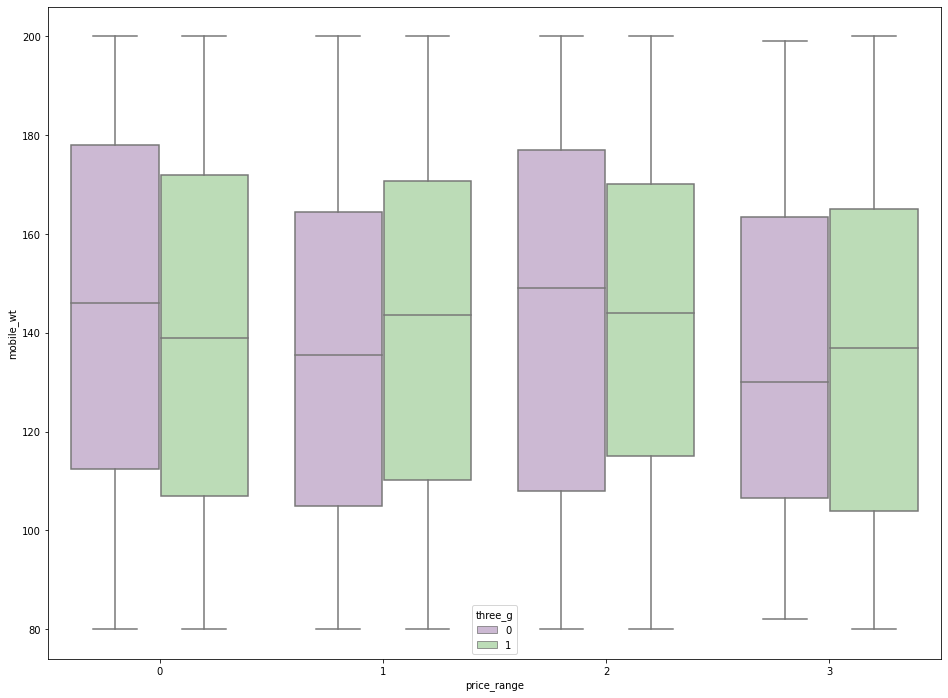

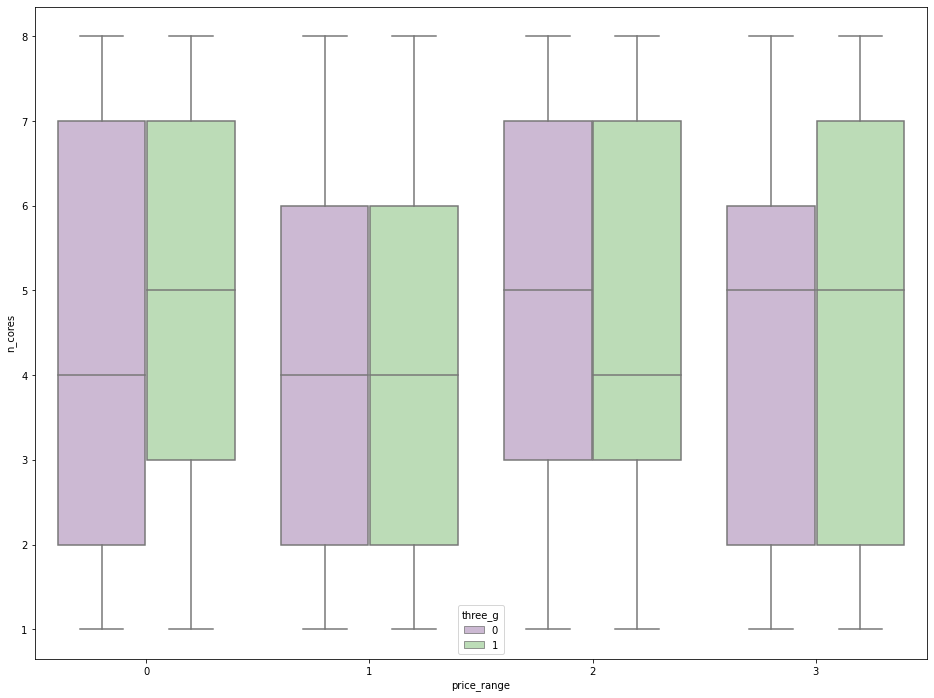

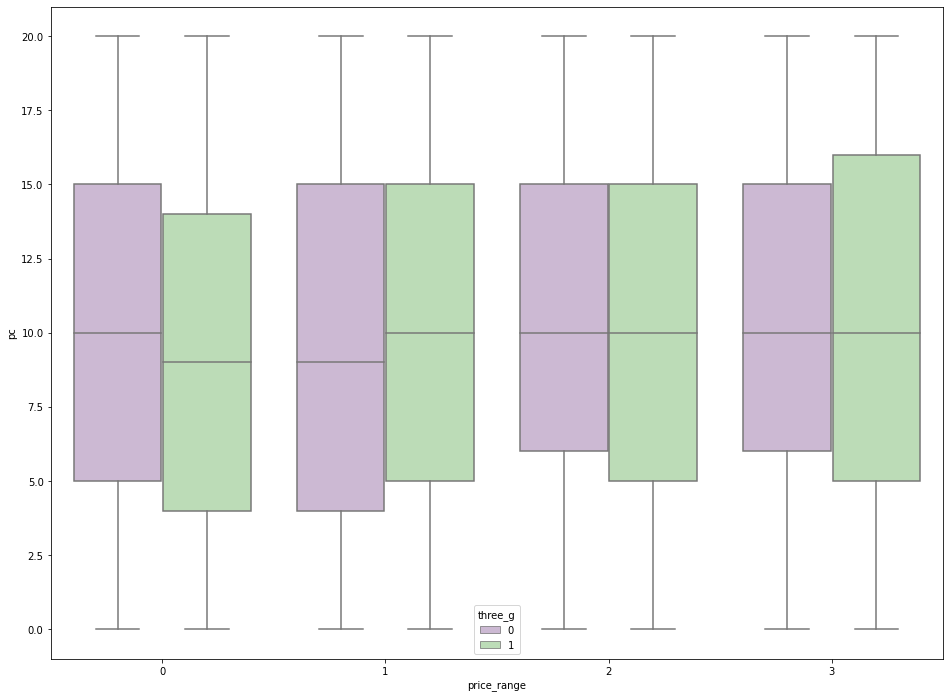

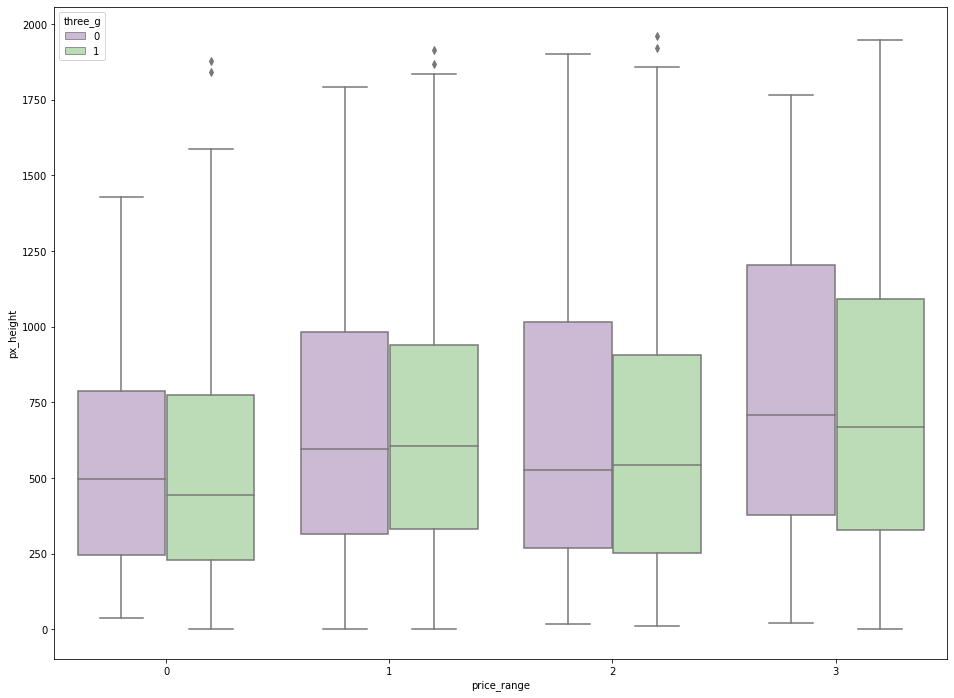

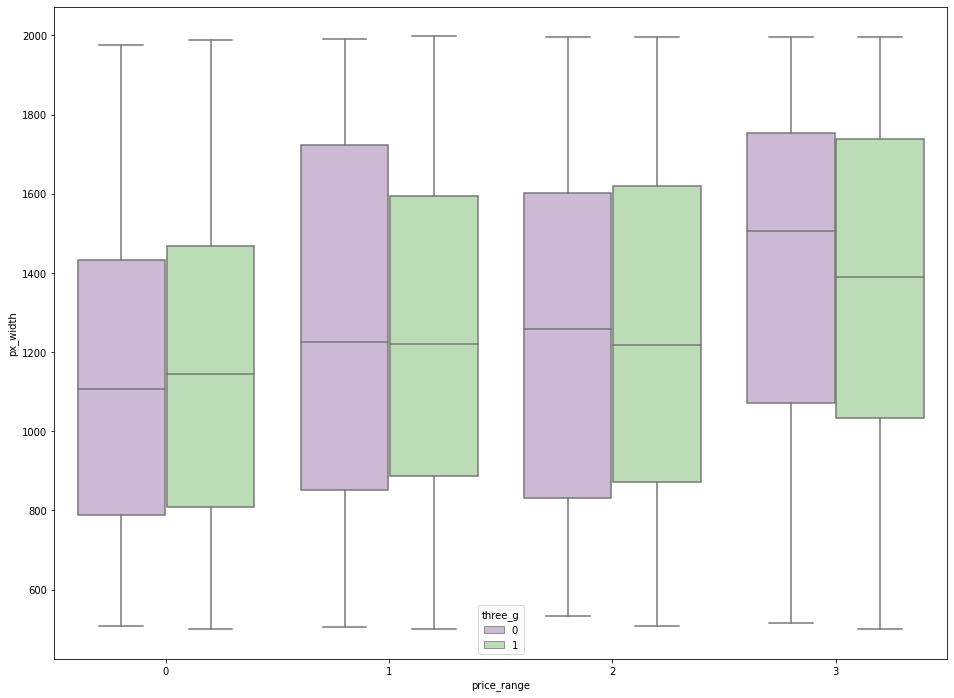

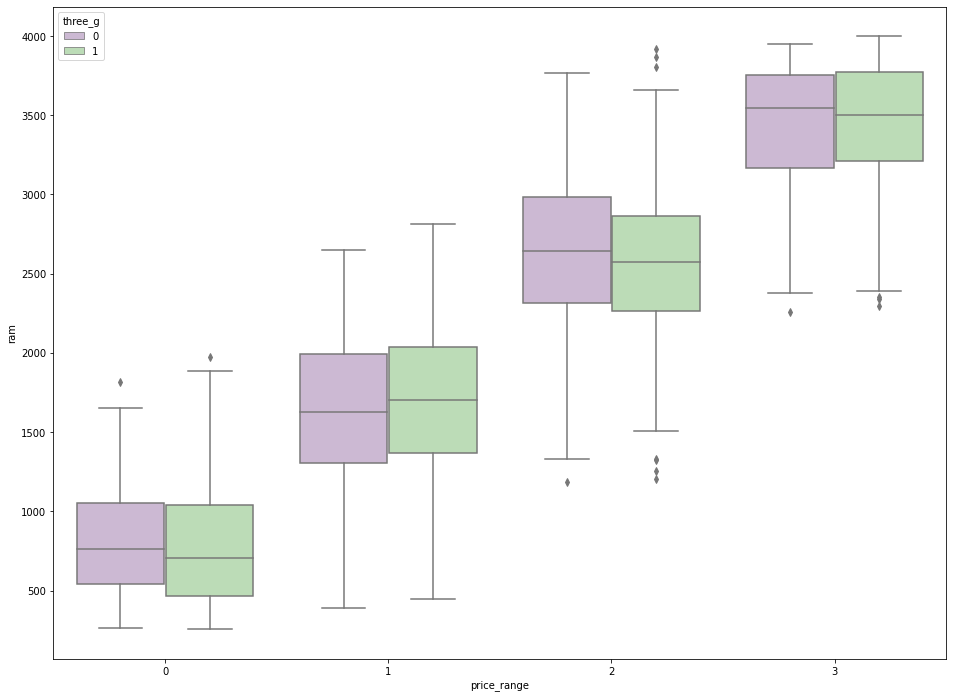

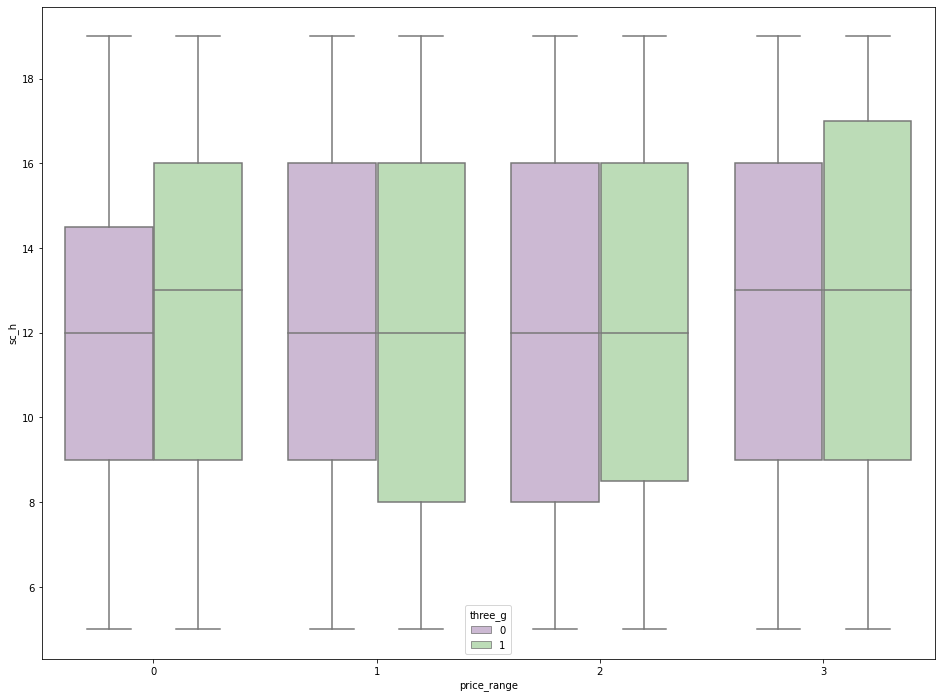

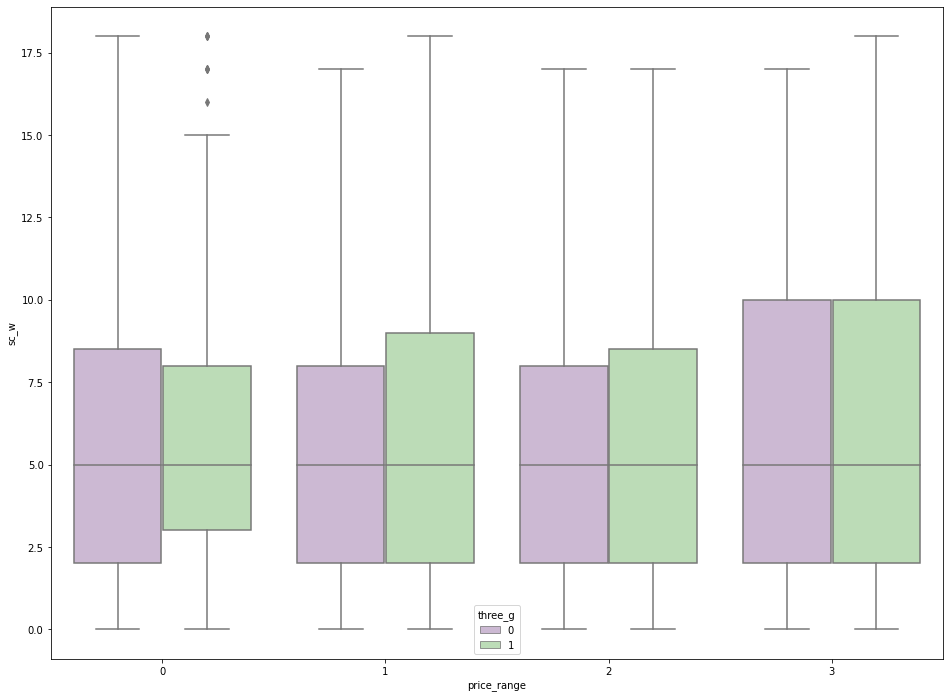

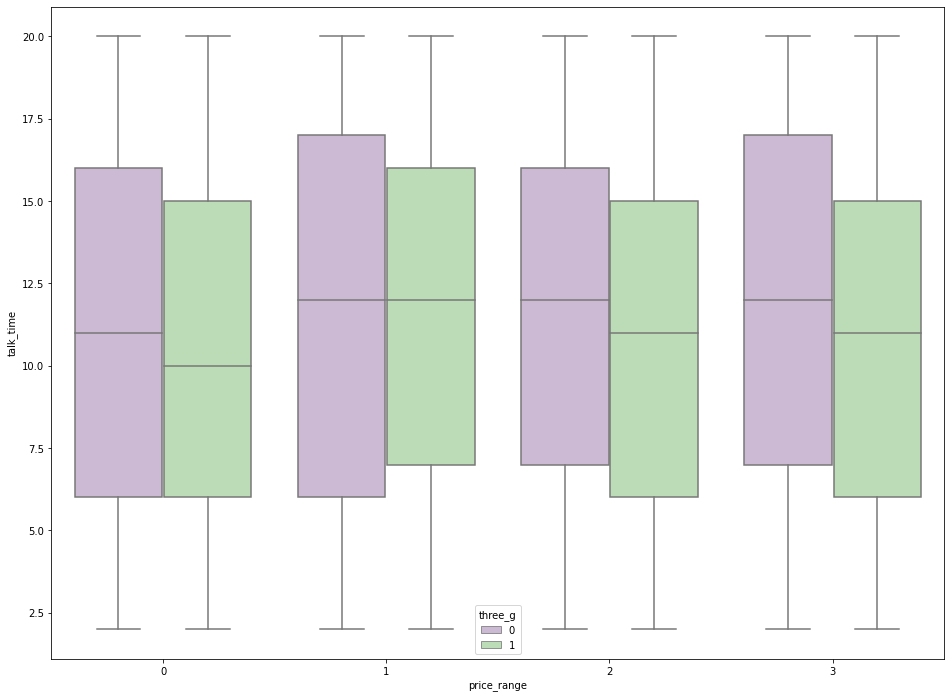

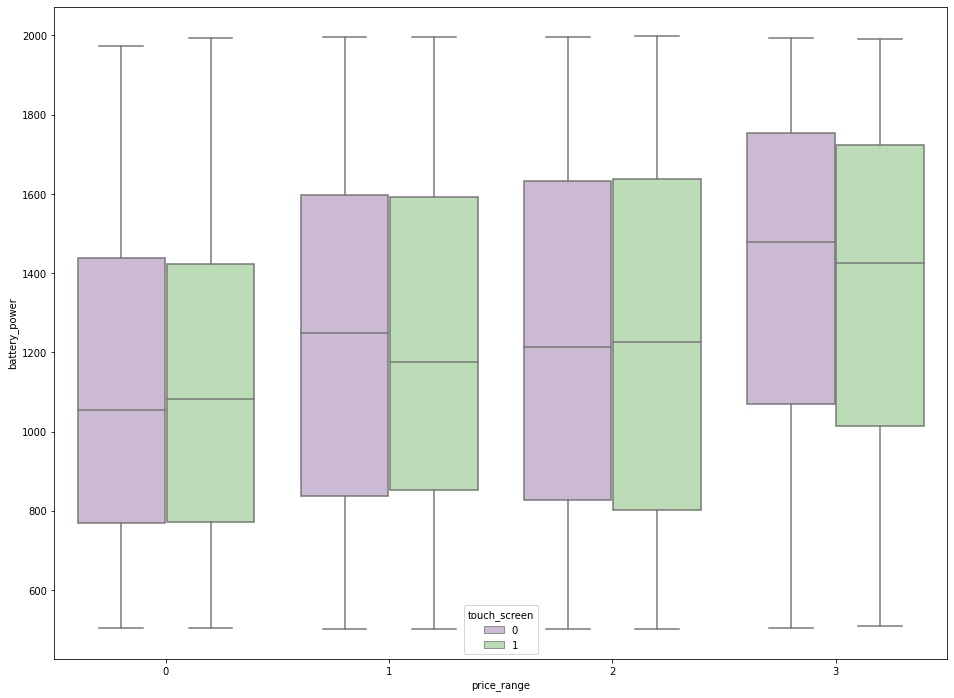

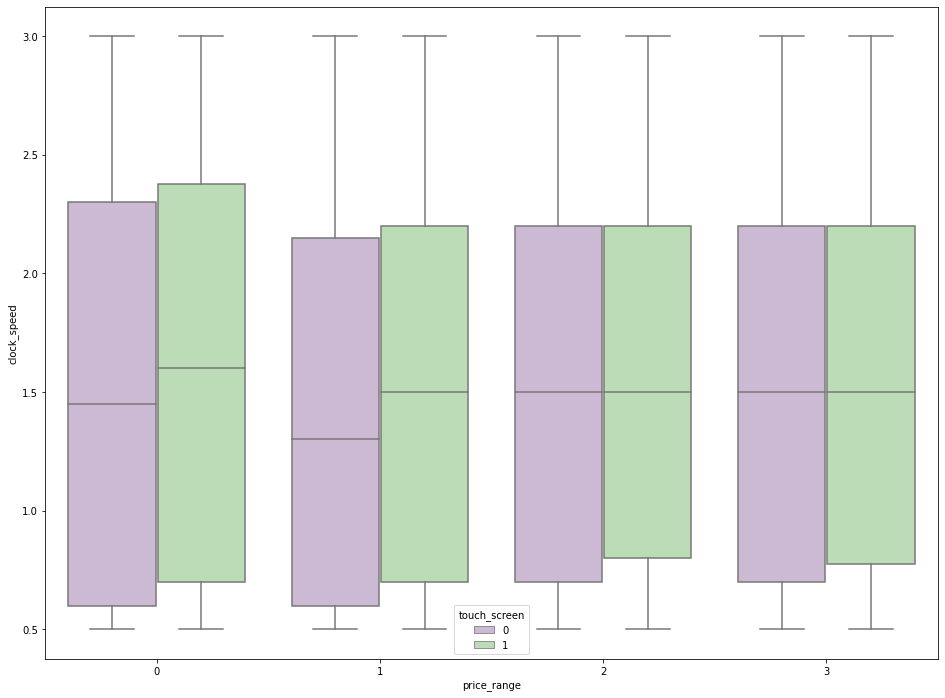

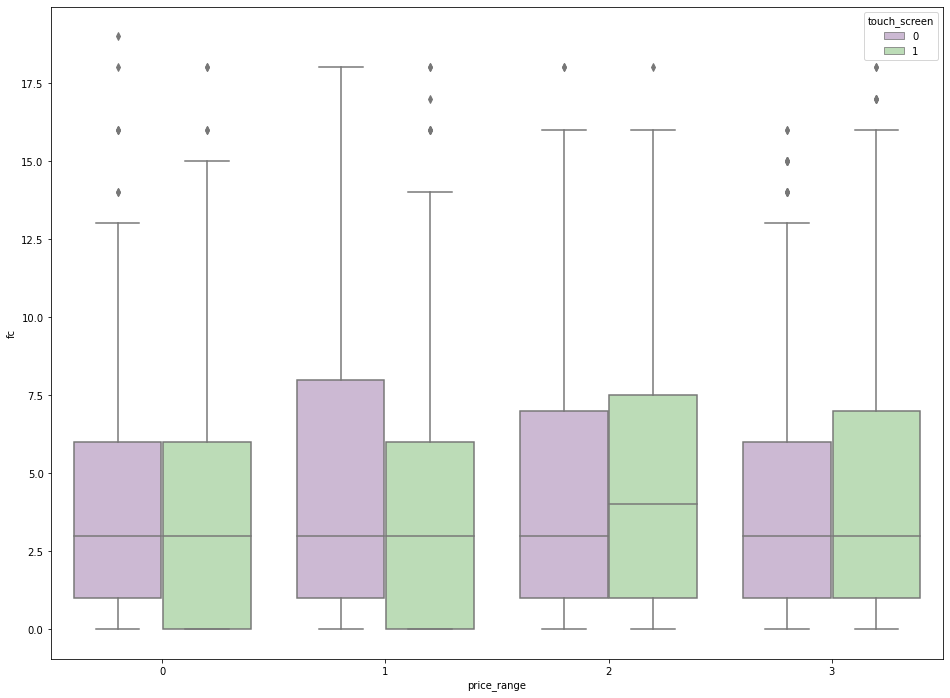

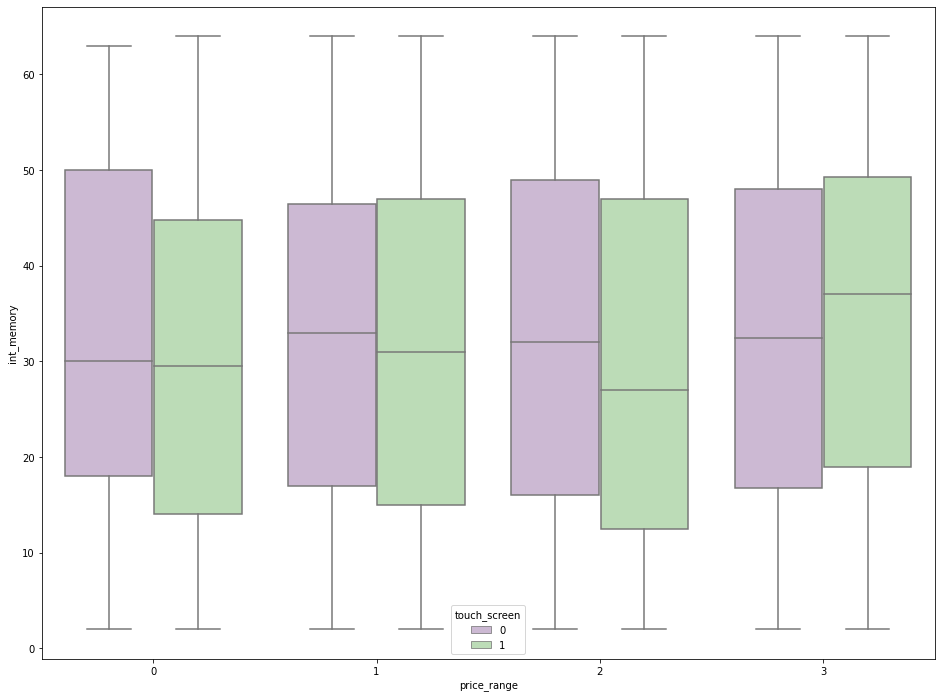

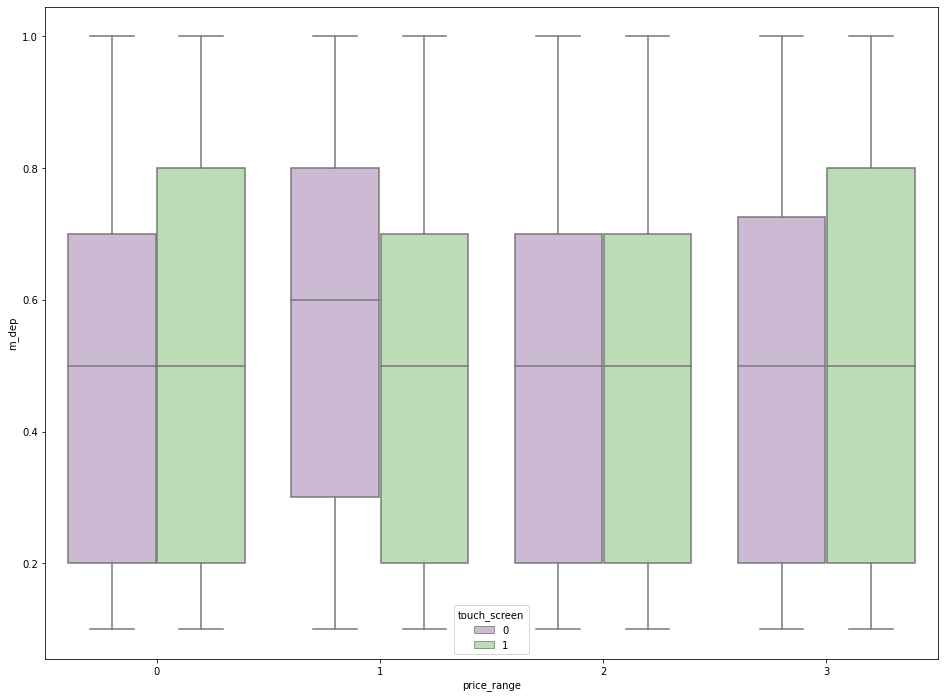

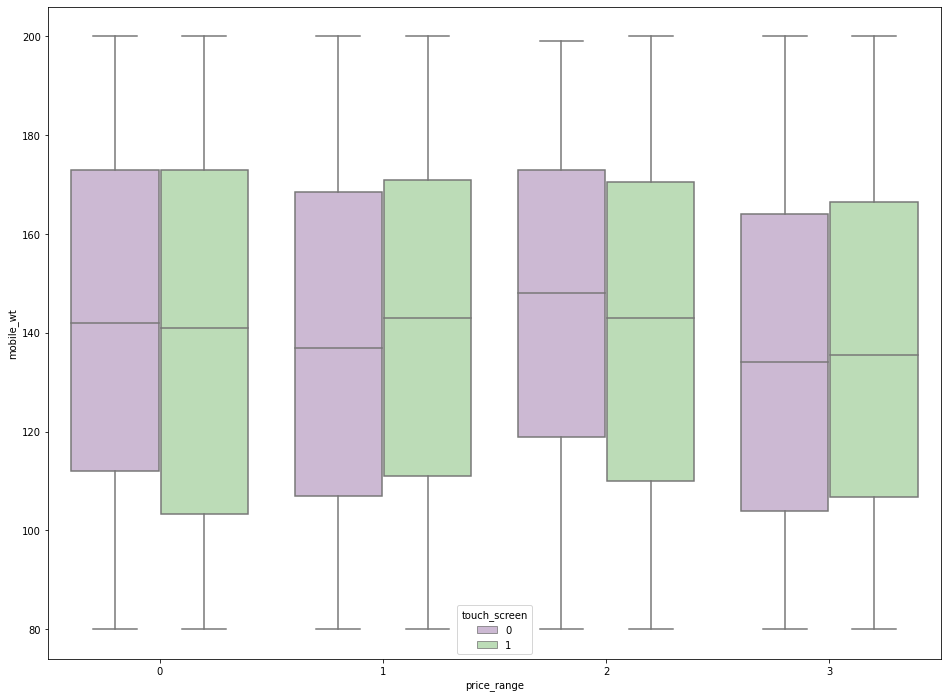

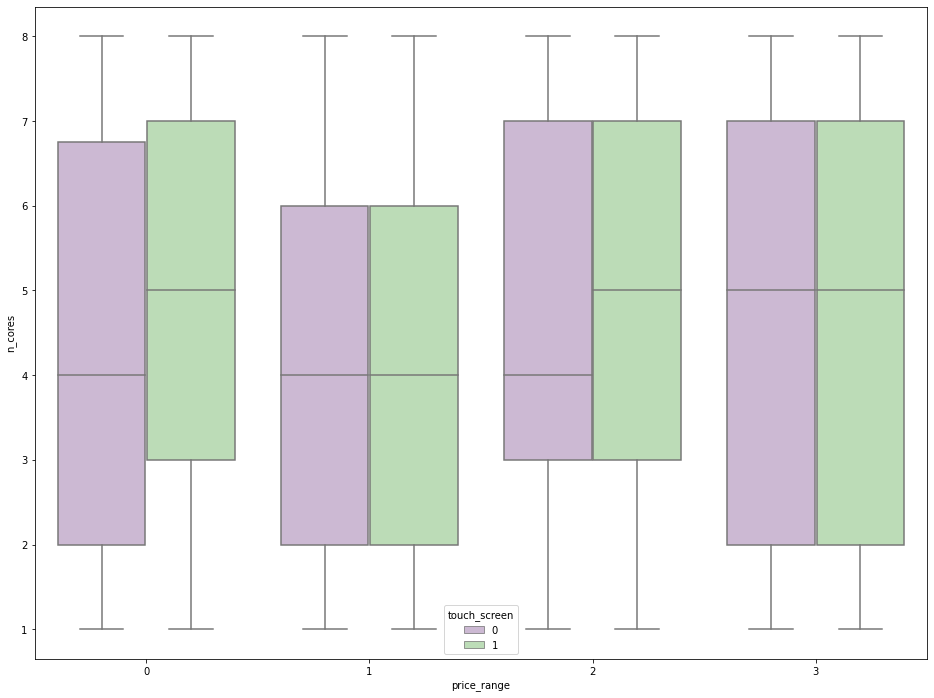

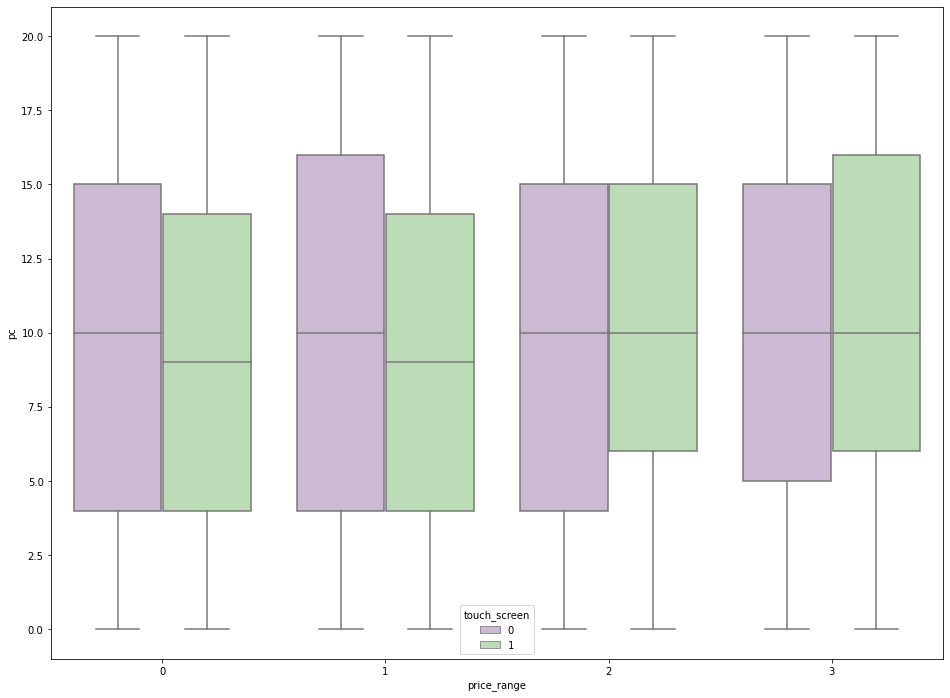

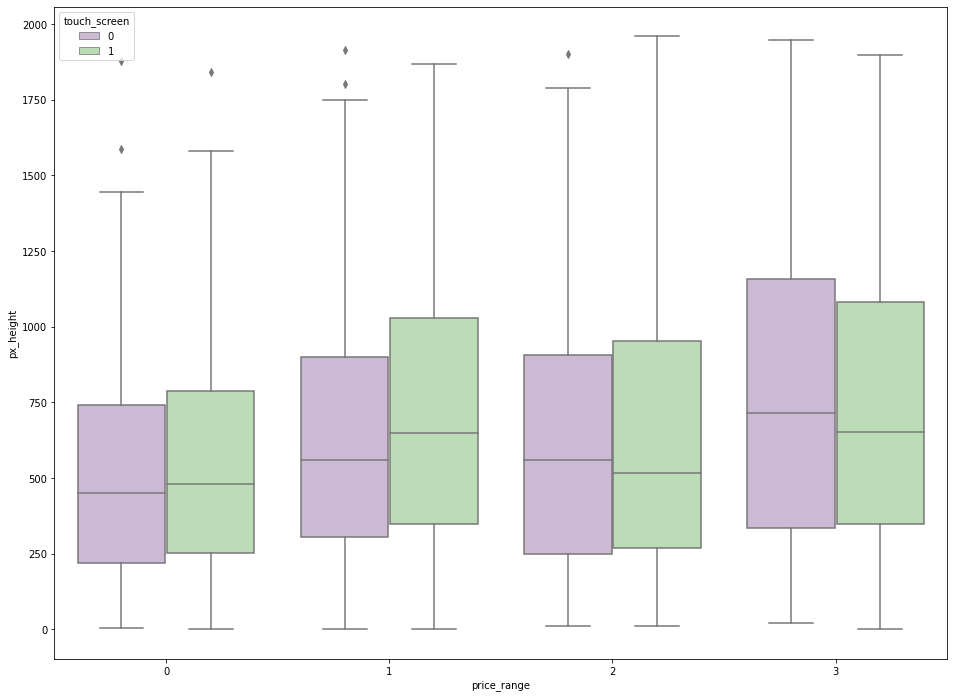

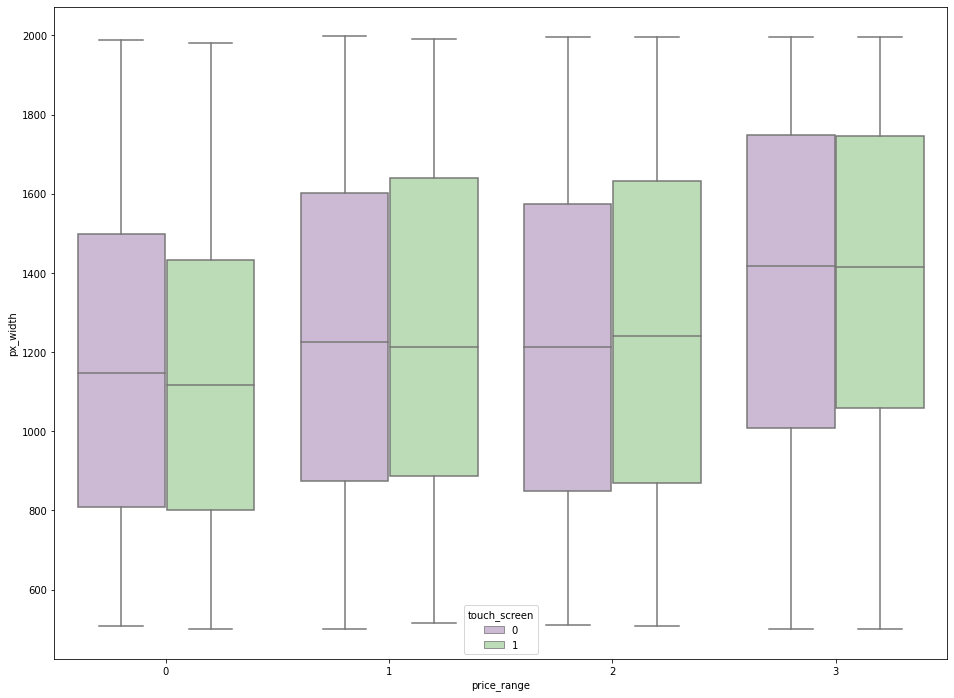

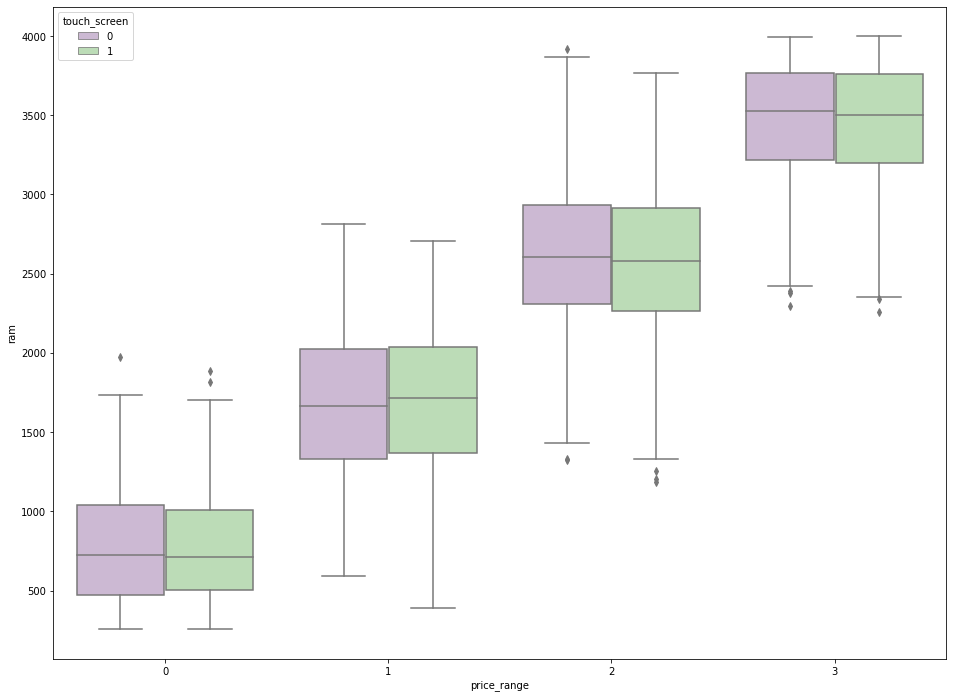

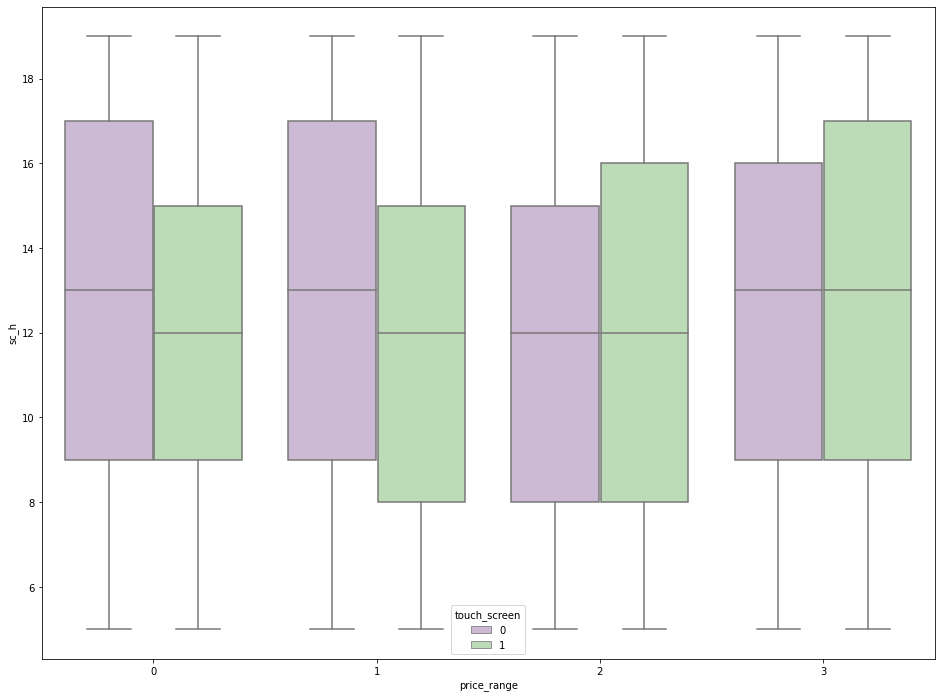

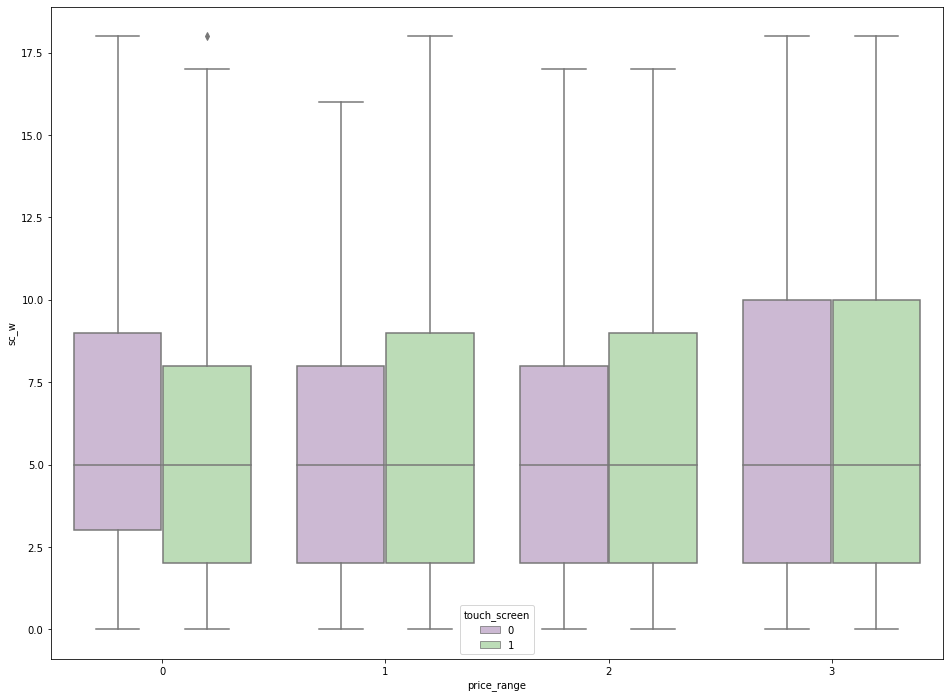

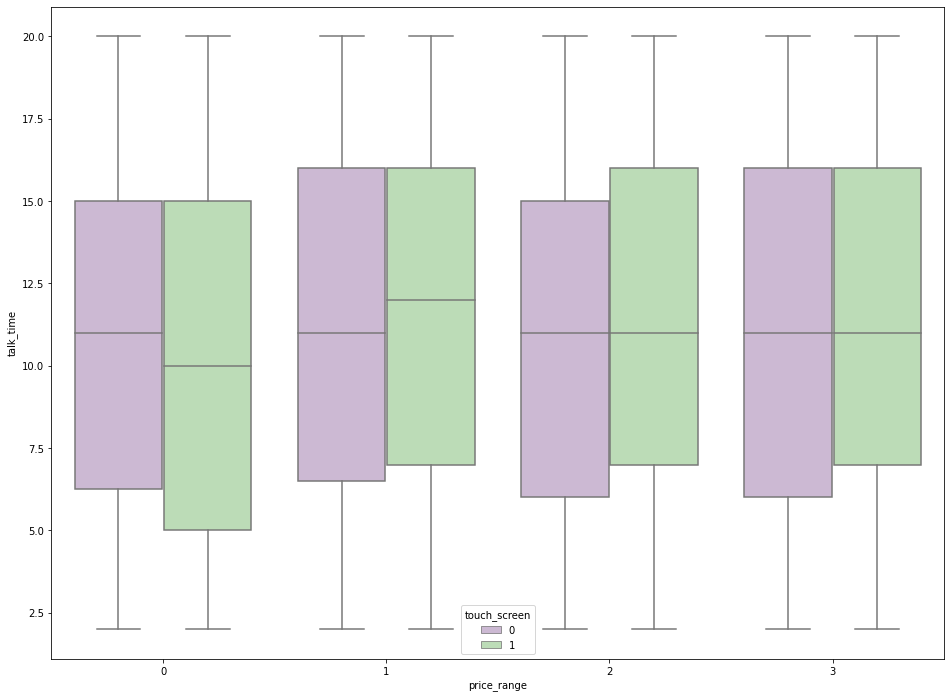

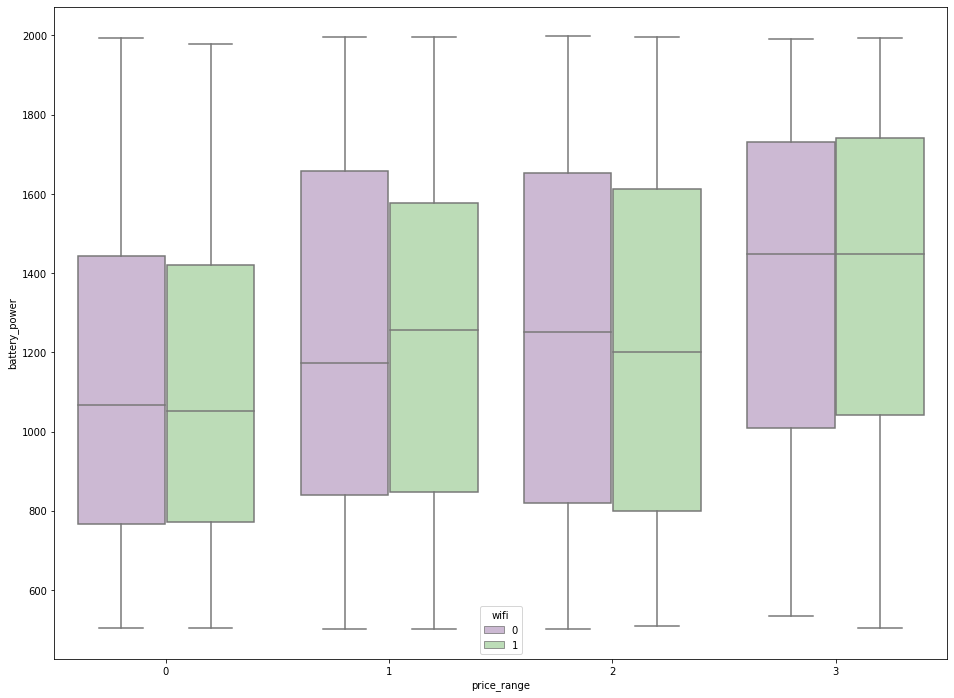

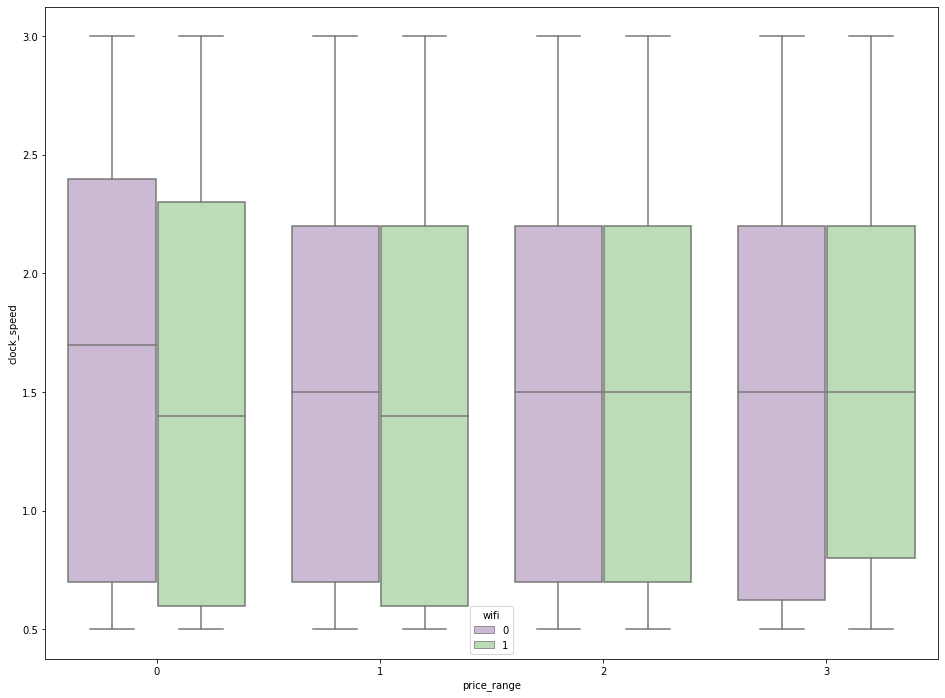

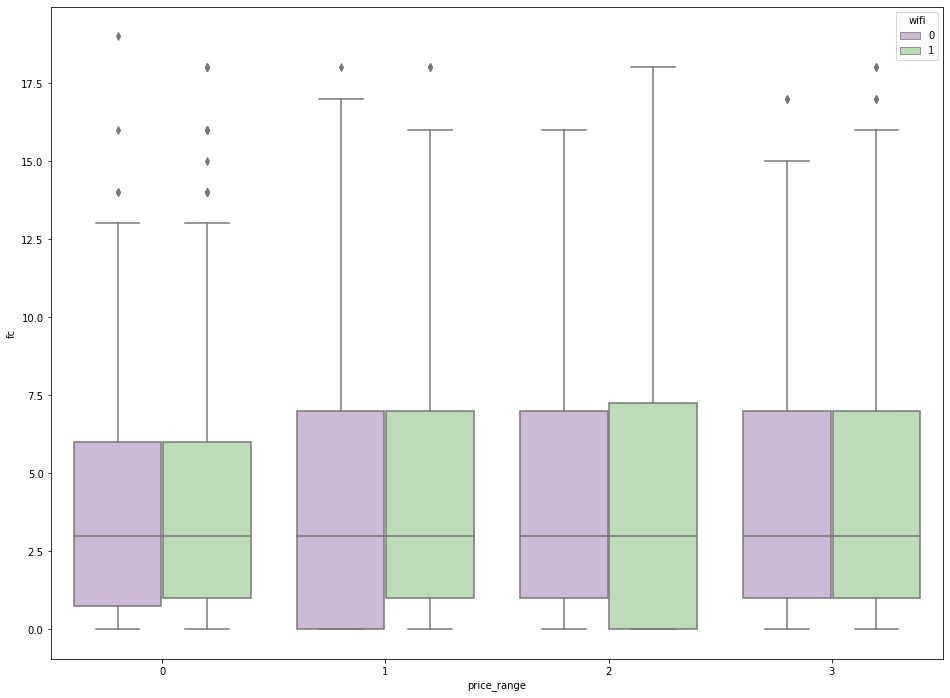

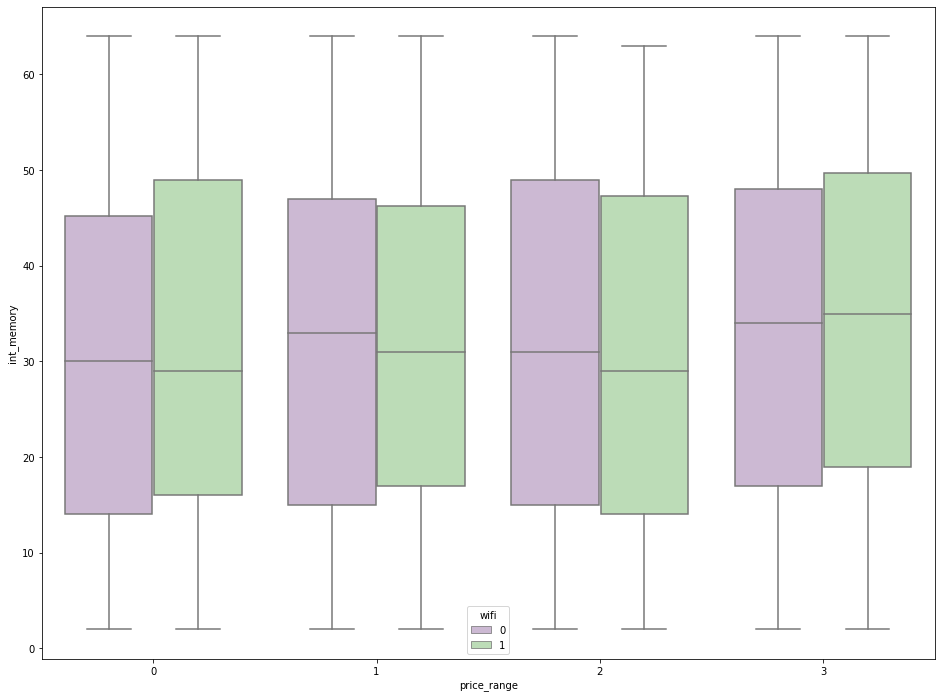

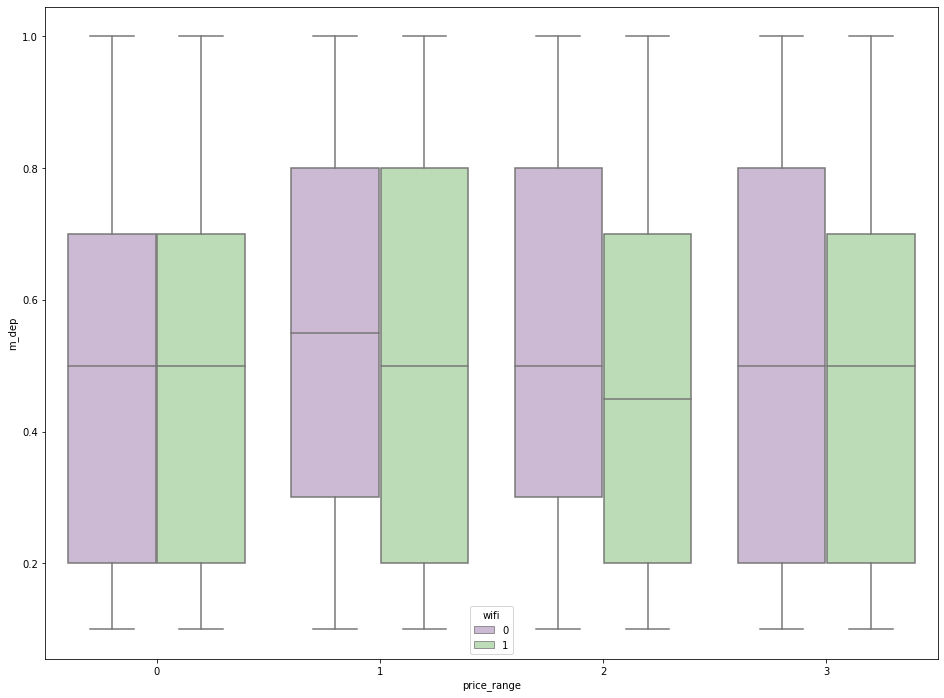

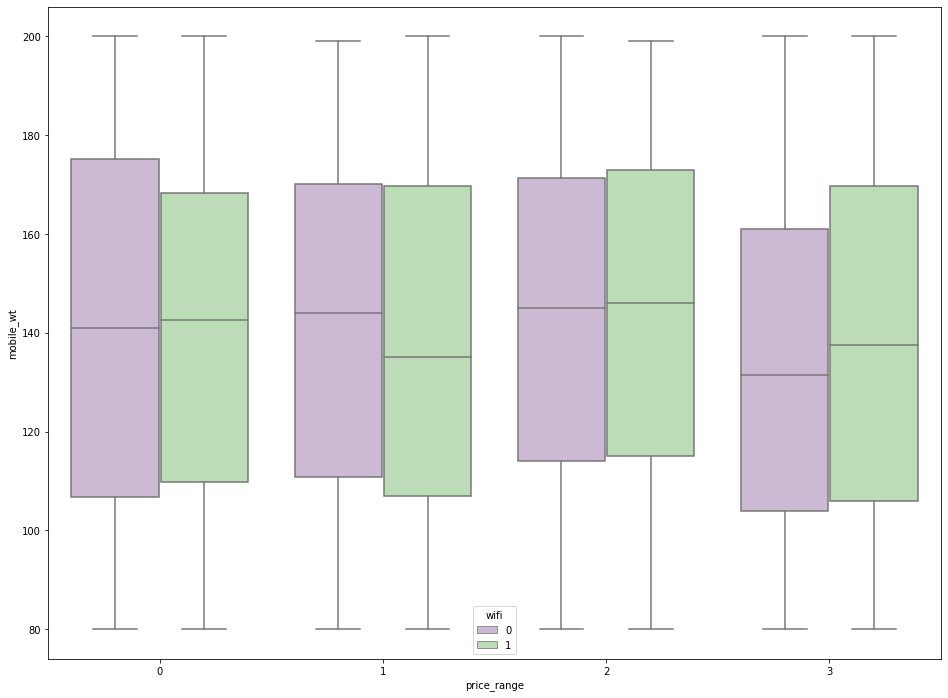

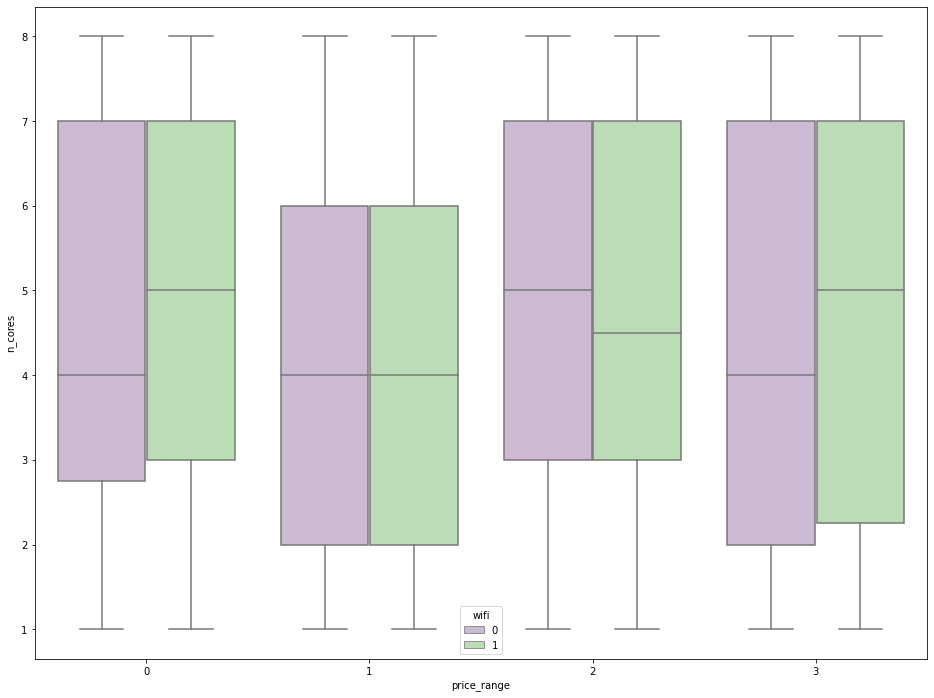

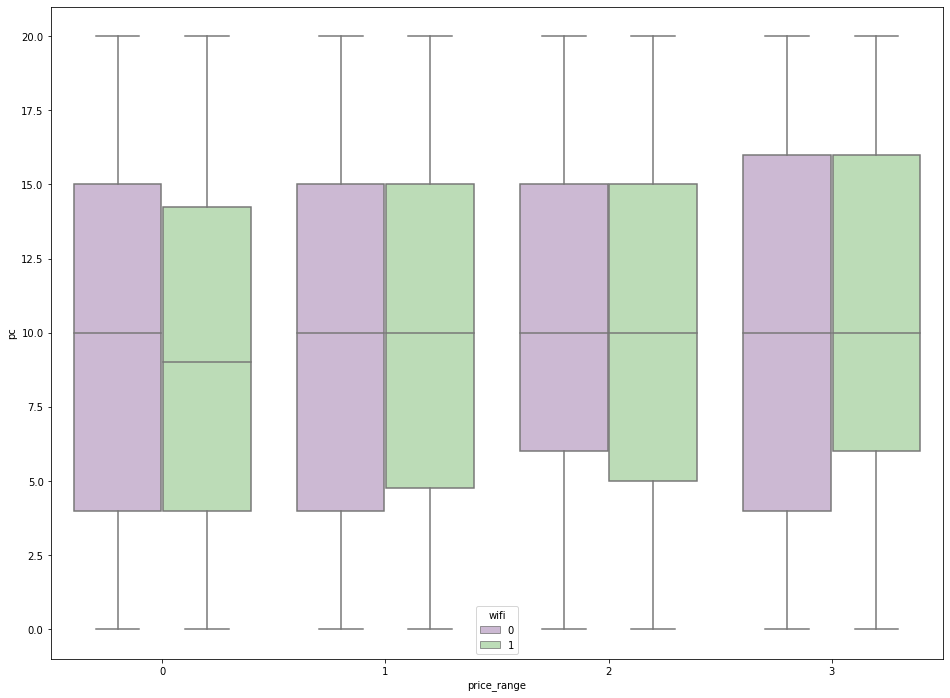

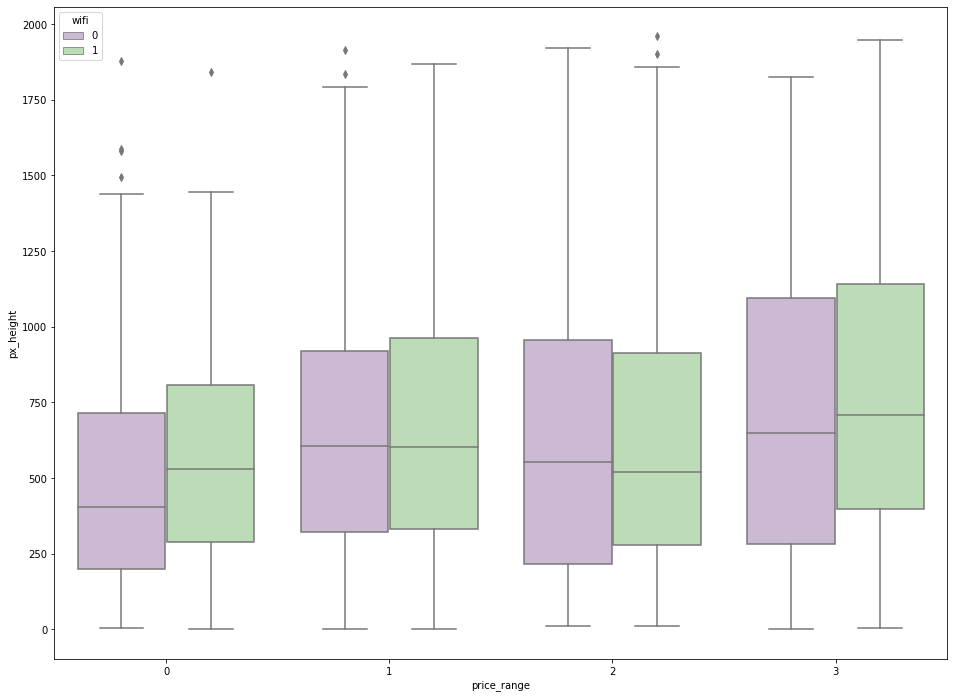

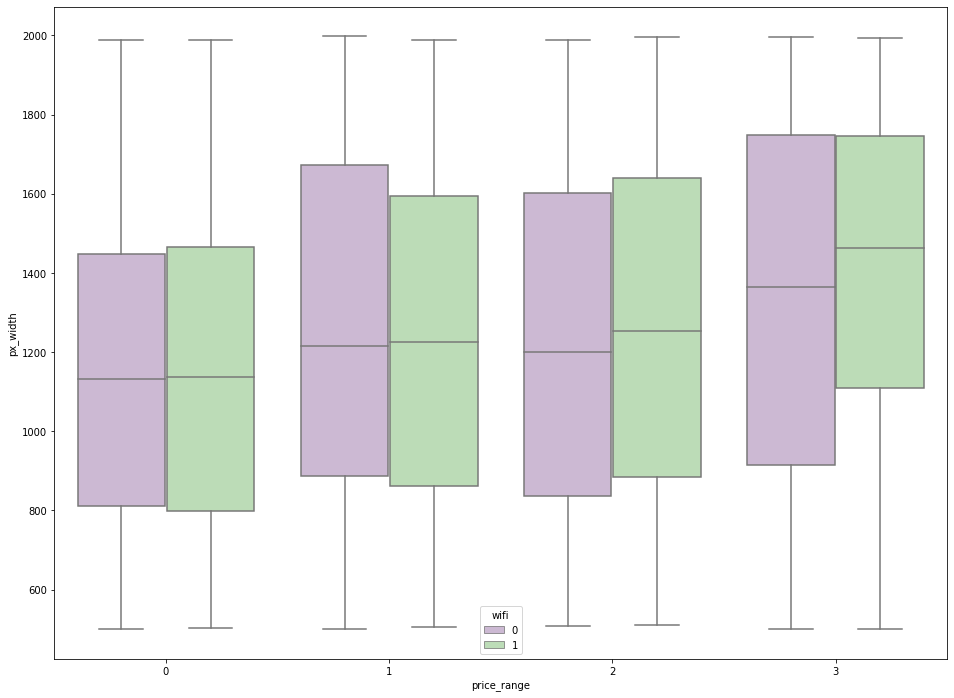

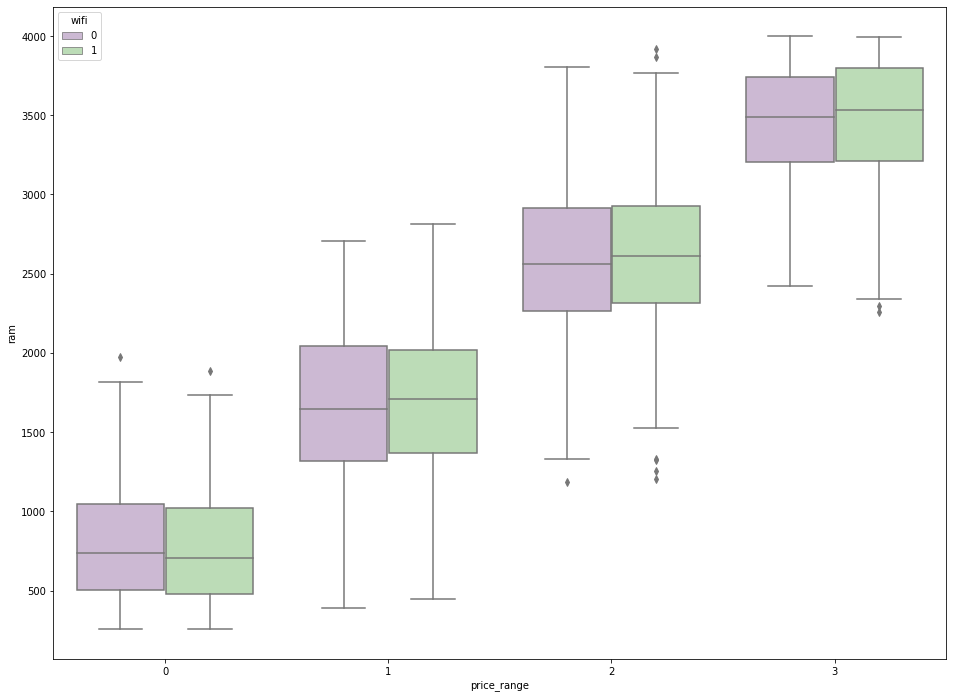

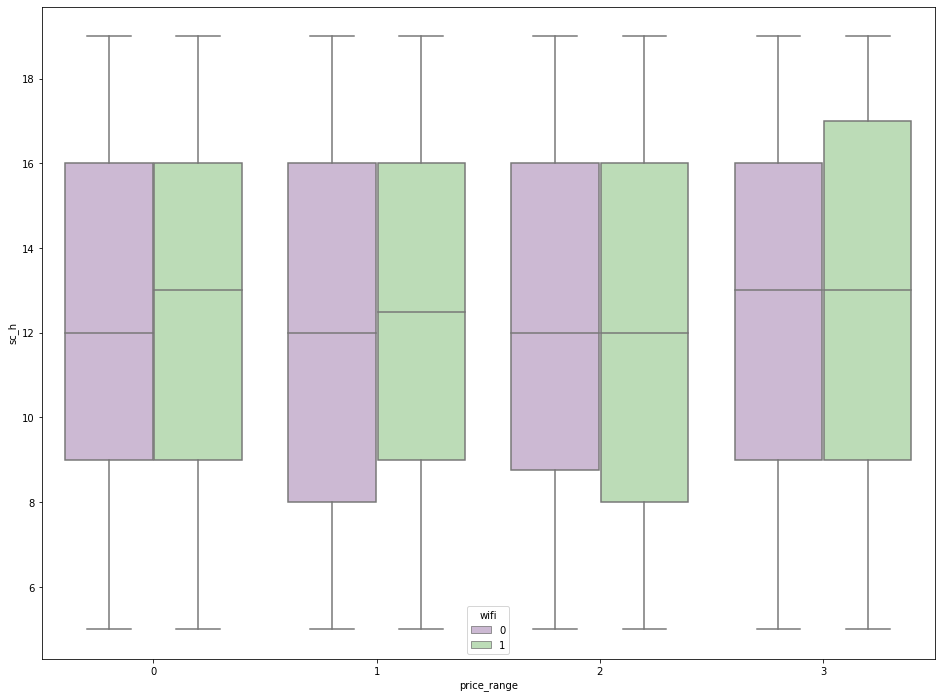

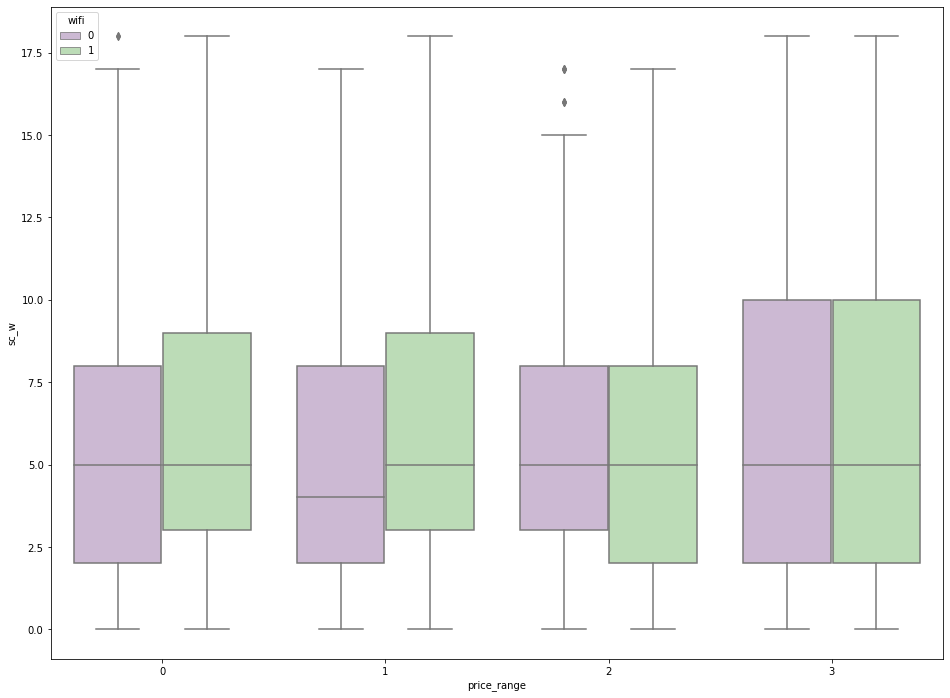

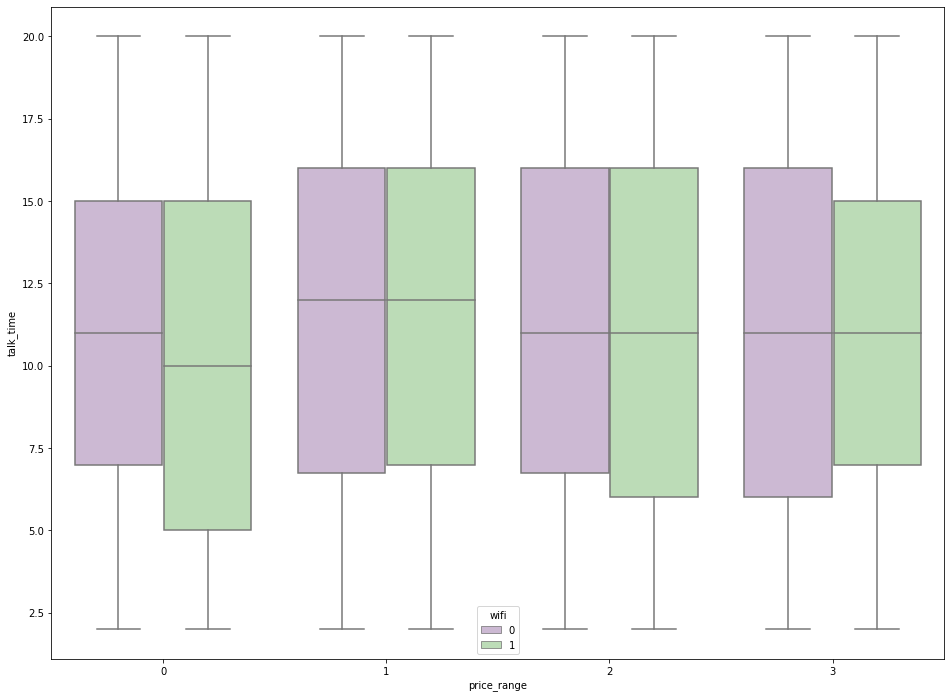

In [38]:
for i in combined_columns:
    for j in other_columns:
        comb_plot(j,i,df)

##### <a id="5"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:300%;text-align:center;border-radius: 15px 50px;">MACHINE LEARNING</h1>

##### <a id="5.1"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">THE TARGET VALUE</h1>

In [39]:
train_df['price_range'].unique()

array([1, 2, 3, 0])

> The target value is categorial and the data given with discrete value so it's not important to change anything

> all variable is ready to be predicted

##### <a id="5.2"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">PREPARE THE DATA</h1>

In [40]:
X = train_df.drop(['price_range'],axis=1)
y = train_df['price_range']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

##### <a id="5.3"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">LOGISTIC REGRESSION</h1>

In [43]:
from sklearn.linear_model import LogisticRegression
st_time_train_ir = time.time()
ir = LogisticRegression()
ir.fit(X_train, y_train)
end_time_train_ir = time.time()
elapsed_time_train_ir = end_time_train_ir - st_time_train_ir

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
st_time_test_ir = time.time()
y_pred_ir = ir.predict(X_test)                    # prediction on test data
end_time_test_ir = time.time()
elapsed_time_test_ir = end_time_test_ir - st_time_test_ir
print(confusion_matrix(y_test,y_pred_ir))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_ir))
print(classification_report(y_test,y_pred_ir))
acc_ir= accuracy_score(y_test,y_pred_ir)

[[80 18  2  0]
 [12 66 21  9]
 [ 0 24 47 23]
 [ 0  0 28 70]]
0.6575
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.61      0.61      0.61       108
           2       0.48      0.50      0.49        94
           3       0.69      0.71      0.70        98

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400



##### <a id="5.4"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">KNEIGHBORS CLASSIFIER</h1>

In [45]:
from sklearn.neighbors import KNeighborsClassifier
st_time_train_neigh = time.time()
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
end_time_train_neigh = time.time()
elapsed_time_train_neigh = end_time_train_neigh - st_time_train_neigh

In [46]:
st_time_test_neigh = time.time()
y_pred_neigh = neigh.predict(X_test)                    # prediction on test data
end_time_test_neigh = time.time()
elapsed_time_test_neigh = end_time_test_neigh - st_time_test_neigh
print(confusion_matrix(y_test,y_pred_neigh))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_neigh))
print(classification_report(y_test,y_pred_neigh))
acc_neigh= accuracy_score(y_test,y_pred_neigh)

[[97  3  0  0]
 [ 4 98  6  0]
 [ 0  8 80  6]
 [ 0  0  6 92]]
0.9175
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.90      0.91      0.90       108
           2       0.87      0.85      0.86        94
           3       0.94      0.94      0.94        98

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



##### <a id="5.5"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">SUPPORT VECTOR MACHINE (SVM)</h1>

In [47]:
from sklearn import svm
st_time_train_clf = time.time()
clf = svm.SVC()
clf.fit(X_train, y_train)
end_time_train_clf = time.time()
elapsed_time_train_clf = end_time_train_clf - st_time_train_clf

In [48]:
st_time_test_clf = time.time()
y_pred_clf = clf.predict(X_test)                    # prediction on test data
end_time_test_clf = time.time()
elapsed_time_test_clf = end_time_test_clf - st_time_test_clf
print(confusion_matrix(y_test,y_pred_clf))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf))
acc_clf= accuracy_score(y_test,y_pred_clf)

[[ 98   2   0   0]
 [  4 102   2   0]
 [  0   8  80   6]
 [  0   0   1  97]]
0.9425
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.91      0.94      0.93       108
           2       0.96      0.85      0.90        94
           3       0.94      0.99      0.97        98

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



##### <a id="5.6"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">DECISION TREE</h1>

In [49]:
from sklearn import tree
st_time_train_treee = time.time()
treee = tree.DecisionTreeClassifier()
treee.fit(X_train, y_train)
end_time_train_treee = time.time()
elapsed_time_train_treee = end_time_train_treee - st_time_train_treee

In [50]:
st_time_test_treee = time.time()
y_pred_treee = treee.predict(X_test)                    # prediction on test data
end_time_test_treee = time.time()
elapsed_time_test_treee = end_time_test_treee - st_time_test_treee
print(confusion_matrix(y_test,y_pred_treee))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_treee))
print(classification_report(y_test,y_pred_treee))
acc_treee= accuracy_score(y_test,y_pred_treee)

[[87 13  0  0]
 [ 9 83 16  0]
 [ 0  8 79  7]
 [ 0  0 11 87]]
0.84
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.80      0.77      0.78       108
           2       0.75      0.84      0.79        94
           3       0.93      0.89      0.91        98

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



##### <a id="5.7"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">RANDOM FOREST</h1>

In [51]:
from sklearn.ensemble import RandomForestClassifier
st_time_train_rf = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
end_time_train_rf = time.time()
elapsed_time_train_rf = end_time_train_rf - st_time_train_rf

In [52]:
st_time_test_rf = time.time()
y_pred_rf = rf.predict(X_test)                    # prediction on test data
end_time_test_rf = time.time()
elapsed_time_test_rf = end_time_test_rf - st_time_test_rf
print(confusion_matrix(y_test,y_pred_rf))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
acc_rf= accuracy_score(y_test,y_pred_rf)

[[96  4  0  0]
 [ 9 86 13  0]
 [ 0 14 75  5]
 [ 0  0  3 95]]
0.88
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.83      0.80      0.81       108
           2       0.82      0.80      0.81        94
           3       0.95      0.97      0.96        98

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



##### <a id="5.8"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">NAIVE BAYES</h1>

In [53]:
from sklearn.naive_bayes import GaussianNB
st_time_train_gnb = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end_time_train_gnb = time.time()
elapsed_time_train_gnb = end_time_train_gnb - st_time_train_gnb

In [54]:
st_time_test_gnb = time.time()
y_pred_gnb = gnb.predict(X_test)                    # prediction on test data
end_time_test_gnb = time.time()
elapsed_time_test_gnb = end_time_test_gnb - st_time_test_gnb
print(confusion_matrix(y_test,y_pred_gnb))         # evaluation on different metrics
print(accuracy_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
acc_gnb= accuracy_score(y_test,y_pred_gnb)

[[86 13  1  0]
 [ 5 82 21  0]
 [ 0 21 64  9]
 [ 0  0  3 95]]
0.8175
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       100
           1       0.71      0.76      0.73       108
           2       0.72      0.68      0.70        94
           3       0.91      0.97      0.94        98

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



##### <a id="5.9"></a>
<h1 style="background-color:aqua;font-family:Buffalo;font-size:200%;text-align:left;border-radius: 15px 50px;">COMPARISON OF IMPLEMENTED ALGORITHMS</h1>

In [55]:
data = {'Accuracy':[acc_ir,acc_neigh,acc_clf,acc_treee,acc_rf,acc_gnb], # creating data contains metrics of evaluation
        'Train time':[elapsed_time_train_ir,elapsed_time_train_neigh,elapsed_time_train_clf,elapsed_time_train_treee,elapsed_time_train_rf,elapsed_time_train_gnb],
        'Predict time':[end_time_test_ir,end_time_test_neigh,end_time_test_clf,end_time_test_treee,end_time_test_rf,end_time_test_gnb],
        'Algo':['LR','KNN','SVM','TREE','RF','NB'] }
data = pd.DataFrame(data)        # making dataframe of data

In [56]:
data    # visualising data

,Accuracy,Train time,Predict time,Algo
0,0.6575,0.106429,1.673672e+09,LR
1,0.9175,0.002991,1.673672e+09,KNN
2,0.9425,0.046020,1.673672e+09,SVM
3,0.8400,0.015491,1.673672e+09,TREE
4,0.8800,0.424149,1.673672e+09,RF
5,0.8175,0.004021,1.673672e+09,NB


The best clasifier is KNN because it has high accuracy and low train time and that is all we need